Training of baseline classifier with the original dataset

Training of new classifiers with augmented dataset


In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
os.chdir('/content/gdrive/My Drive/final_files/')
!ls

In [ ]:
%matplotlib inline
import sys
sys.path.append('classification/')
from classify import run_training


STEP 0. Set up training configs

In [ ]:
class config:
    path_data = 'classification/data/'
    arch = 'drn_c_26'
    workers = 4
    epochs = 100
    batch_size = 32
    lr = 0.1
    momentum = 0.9
    weight_decay = 1e-4
    # freq for printing metrics and loss
    print_freq = 10
    # freq for saving model and plot metrics & loss
    check_freq = 10
    # if use pretrained model
    pretrained = 0
    crop_size = 224
    scale_size = 256
    step_ratio = 0.1
    savepath = 'classification/classify_01_models/'
    opt_name = 'SGD'
    loss_name = 'focal'
    best_name = 'auc'
    trans_patch_path = 'translation/translated_patches/'
    aug_weights = 'classification/classify_01_models/classify_20200525-0843_focal_SGD_lr_0.1/model_best.pth.tar'

    def __init__(self, aug, aug_threshold, aug_type):
        self.aug = aug
        self.aug_threshold = aug_threshold
        self.aug_type = aug_type



STEP 1. Train baseline model using original dataset


In [ ]:
# configs for baseline model
conf = config(aug = 0, aug_threshold = None, aug_type = None)

# init trainer
trainer = run_training()

# prepare training data
trainer.prepare_data(conf)

In [ ]:
# check data before training
trainer.check_data(conf)

In [ ]:
# run main training
trainer.main_train(conf)

STEP 2. Train new model with augmented dataset

In [ ]:
# configs for training
conf = config(aug = 1, aug_threshold = 0.9, aug_type = 'a2b_9')

In [ ]:
# init training class
trainer = run_training()
# prepare training data
trainer.prepare_data(conf)

In [ ]:
# check data before training
trainer.check_data(conf)

Epoch [0] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [0][0/804]	Time 1.077 (1.077)	Loss 0.2968 (0.2968)	Sensitivity 0.952 (0.952)	Specificity 0.000 (0.000)	F1 0.769 (0.769)	Accuracy 0.625 (0.625)	
Epoch: [0][10/804]	Time 0.782 (0.806)	Loss 0.3392 (4.4788)	Sensitivity 0.687 (0.787)	Specificity 0.500 (0.194)	F1 0.629 (0.676)	Accuracy 0.594 (0.597)	
Epoch: [0][20/804]	Time 0.790 (0.795)	Loss 0.1989 (2.4955)	Sensitivity 1.000 (0.801)	Specificity 0.000 (0.226)	F1 0.857 (0.705)	Accuracy 0.750 (0.618)	
Epoch: [0][30/804]	Time 0.791 (0.794)	Loss 0.5744 (1.8256)	Sensitivity 0.364 (0.806)	Specificity 1.000 (0.247)	F1 0.533 (0.705)	Accuracy 0.562 (0.620)	
Epoch: [0][40/804]	Time 0.794 (0.793)	Loss 0.2313 (1.4300)	Sensitivity 1.000 (0.813)	Specificity 0.000 (0.237)	F1 0.877 (0.703)	Accuracy 0.781 (0.625)	
Epoch: [0][50/804]	Time 0.790 (0.792)	Loss 0.6094 (1.2550)	Sensitivity 0.435 (0.819)	Specificity 1.000 (0.232)	F1 0.606 (0.699)	Accuracy 0.594 (0.621)	
Epoch: [0][60/804]	Time 0.780 (0.791)	Loss 0.5092 (1.1047)	Sensitivity 0.286 (0.816)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 15.338 (15.338)	Loss 0.0754 (0.0754)	Sensitivity 0.667 (0.667)	Specificity 0.450 (0.450)	F1 0.516 (0.516)	Accuracy 0.531 (0.531)	
Test: [10/60]	Time 10.231 (5.081)	Loss 0.0685 (0.0651)	Sensitivity 0.687 (0.681)	Specificity 0.625 (0.675)	F1 0.667 (0.619)	Accuracy 0.656 (0.679)	
Test: [20/60]	Time 4.394 (4.275)	Loss 0.0813 (0.0681)	Sensitivity 0.533 (0.637)	Specificity 0.529 (0.676)	F1 0.516 (0.593)	Accuracy 0.531 (0.665)	
Test: [30/60]	Time 5.319 (4.184)	Loss 0.0744 (0.0661)	Sensitivity 0.643 (0.650)	Specificity 0.556 (0.688)	F1 0.581 (0.602)	Accuracy 0.594 (0.677)	
Test: [40/60]	Time 14.052 (4.255)	Loss 0.0574 (0.0654)	Sensitivity 0.636 (0.657)	Specificity 0.714 (0.697)	F1 0.583 (0.613)	Accuracy 0.688 (0.684)	
Test: [50/60]	Time 0.235 (4.020)	Loss 0.0719 (0.0662)	Sensitivity 0.333 (0.645)	Specificity 0.783 (0.696)	F1 0.353 (0.603)	Accuracy 0.656 (0.681)	
 * Sensitivity 0.650 Specificity 0.699 F1 0.613 Acc 0.684 ROC AUC 0.745
Epoch [1] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [1][0/804]	Time 0.878 (0.878)	Loss 0.0376 (0.0376)	Sensitivity 0.889 (0.889)	Specificity 0.571 (0.571)	F1 0.800 (0.800)	Accuracy 0.750 (0.750)	
Epoch: [1][10/804]	Time 0.802 (0.804)	Loss 0.0443 (0.0432)	Sensitivity 0.917 (0.942)	Specificity 0.250 (0.411)	F1 0.846 (0.824)	Accuracy 0.750 (0.747)	
Epoch: [1][20/804]	Time 0.823 (0.810)	Loss 0.0370 (0.0421)	Sensitivity 1.000 (0.958)	Specificity 0.250 (0.322)	F1 0.816 (0.822)	Accuracy 0.719 (0.732)	
Epoch: [1][30/804]	Time 0.800 (0.811)	Loss 0.0357 (0.0414)	Sensitivity 0.947 (0.953)	Specificity 0.308 (0.371)	F1 0.783 (0.824)	Accuracy 0.688 (0.740)	
Epoch: [1][40/804]	Time 0.791 (0.806)	Loss 0.0404 (0.0412)	Sensitivity 1.000 (0.954)	Specificity 0.154 (0.378)	F1 0.776 (0.827)	Accuracy 0.656 (0.743)	
Epoch: [1][50/804]	Time 0.778 (0.802)	Loss 0.0324 (0.0421)	Sensitivity 1.000 (0.948)	Specificity 0.167 (0.417)	F1 0.912 (0.833)	Accuracy 0.844 (0.754)	
Epoch: [1][60/804]	Time 0.771 (0.797)	Loss 0.0457 (0.0445)	Sensitivity 0.947 (0.942)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.810 (0.810)	Loss 0.0738 (0.0738)	Sensitivity 0.706 (0.706)	Specificity 0.533 (0.533)	F1 0.667 (0.667)	Accuracy 0.625 (0.625)	
Test: [10/60]	Time 0.236 (0.292)	Loss 0.0522 (0.0582)	Sensitivity 0.727 (0.826)	Specificity 0.762 (0.563)	F1 0.667 (0.676)	Accuracy 0.750 (0.673)	
Test: [20/60]	Time 0.238 (0.266)	Loss 0.0596 (0.0584)	Sensitivity 0.765 (0.817)	Specificity 0.667 (0.568)	F1 0.743 (0.660)	Accuracy 0.719 (0.665)	
Test: [30/60]	Time 0.240 (0.257)	Loss 0.0486 (0.0601)	Sensitivity 0.750 (0.804)	Specificity 0.550 (0.557)	F1 0.600 (0.650)	Accuracy 0.625 (0.656)	
Test: [40/60]	Time 0.237 (0.252)	Loss 0.0592 (0.0594)	Sensitivity 0.900 (0.810)	Specificity 0.591 (0.574)	F1 0.643 (0.650)	Accuracy 0.688 (0.666)	
Test: [50/60]	Time 0.236 (0.249)	Loss 0.0650 (0.0588)	Sensitivity 0.800 (0.817)	Specificity 0.529 (0.582)	F1 0.686 (0.662)	Accuracy 0.656 (0.675)	
 * Sensitivity 0.820 Specificity 0.581 F1 0.665 Acc 0.677 ROC AUC 0.794
Epoch [2] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [2][0/804]	Time 0.922 (0.922)	Loss 0.0280 (0.0280)	Sensitivity 1.000 (1.000)	Specificity 0.333 (0.333)	F1 0.885 (0.885)	Accuracy 0.812 (0.812)	
Epoch: [2][10/804]	Time 0.782 (0.793)	Loss 0.0324 (0.0406)	Sensitivity 0.947 (0.947)	Specificity 0.615 (0.373)	F1 0.857 (0.830)	Accuracy 0.812 (0.747)	
Epoch: [2][20/804]	Time 0.787 (0.788)	Loss 0.0294 (0.0410)	Sensitivity 1.000 (0.940)	Specificity 0.364 (0.390)	F1 0.857 (0.832)	Accuracy 0.781 (0.751)	
Epoch: [2][30/804]	Time 0.781 (0.787)	Loss 0.0366 (0.0403)	Sensitivity 1.000 (0.944)	Specificity 0.357 (0.396)	F1 0.800 (0.837)	Accuracy 0.719 (0.758)	
Epoch: [2][40/804]	Time 0.778 (0.786)	Loss 0.0230 (0.0392)	Sensitivity 0.905 (0.946)	Specificity 0.909 (0.406)	F1 0.927 (0.838)	Accuracy 0.906 (0.760)	
Epoch: [2][50/804]	Time 0.781 (0.786)	Loss 0.0382 (0.0395)	Sensitivity 1.000 (0.950)	Specificity 0.154 (0.384)	F1 0.776 (0.838)	Accuracy 0.656 (0.757)	
Epoch: [2][60/804]	Time 0.787 (0.786)	Loss 0.0340 (0.0399)	Sensitivity 1.000 (0.944)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.765 (0.765)	Loss 0.0488 (0.0488)	Sensitivity 1.000 (1.000)	Specificity 0.118 (0.118)	F1 0.667 (0.667)	Accuracy 0.531 (0.531)	
Test: [10/60]	Time 0.241 (0.289)	Loss 0.0504 (0.0566)	Sensitivity 1.000 (0.961)	Specificity 0.364 (0.270)	F1 0.588 (0.637)	Accuracy 0.562 (0.557)	
Test: [20/60]	Time 0.235 (0.265)	Loss 0.0619 (0.0599)	Sensitivity 0.937 (0.944)	Specificity 0.312 (0.318)	F1 0.714 (0.603)	Accuracy 0.625 (0.555)	
Test: [30/60]	Time 0.236 (0.256)	Loss 0.0647 (0.0578)	Sensitivity 0.900 (0.950)	Specificity 0.318 (0.345)	F1 0.529 (0.620)	Accuracy 0.500 (0.578)	
Test: [40/60]	Time 0.238 (0.252)	Loss 0.0485 (0.0579)	Sensitivity 0.941 (0.943)	Specificity 0.267 (0.341)	F1 0.727 (0.623)	Accuracy 0.625 (0.577)	
Test: [50/60]	Time 0.237 (0.249)	Loss 0.0535 (0.0574)	Sensitivity 1.000 (0.941)	Specificity 0.474 (0.351)	F1 0.722 (0.638)	Accuracy 0.688 (0.589)	
 * Sensitivity 0.938 Specificity 0.349 F1 0.635 Acc 0.586 ROC AUC 0.820
Epoch [3] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [3][0/804]	Time 0.939 (0.939)	Loss 0.0373 (0.0373)	Sensitivity 0.950 (0.950)	Specificity 0.667 (0.667)	F1 0.884 (0.884)	Accuracy 0.844 (0.844)	
Epoch: [3][10/804]	Time 0.781 (0.798)	Loss 0.0386 (0.0347)	Sensitivity 1.000 (0.959)	Specificity 0.429 (0.620)	F1 0.818 (0.877)	Accuracy 0.750 (0.830)	
Epoch: [3][20/804]	Time 0.780 (0.790)	Loss 0.0199 (0.0347)	Sensitivity 1.000 (0.953)	Specificity 1.000 (0.623)	F1 1.000 (0.873)	Accuracy 1.000 (0.826)	
Epoch: [3][30/804]	Time 0.786 (0.788)	Loss 0.0365 (0.0361)	Sensitivity 0.909 (0.942)	Specificity 0.500 (0.634)	F1 0.851 (0.870)	Accuracy 0.781 (0.824)	
Epoch: [3][40/804]	Time 0.781 (0.787)	Loss 0.0307 (0.0377)	Sensitivity 0.875 (0.943)	Specificity 0.812 (0.581)	F1 0.848 (0.853)	Accuracy 0.844 (0.799)	
Epoch: [3][50/804]	Time 0.782 (0.786)	Loss 0.0503 (0.0387)	Sensitivity 1.000 (0.941)	Specificity 0.000 (0.583)	F1 0.769 (0.856)	Accuracy 0.625 (0.801)	
Epoch: [3][60/804]	Time 0.784 (0.786)	Loss 0.0218 (0.0381)	Sensitivity 0.952 (0.946)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.713 (0.713)	Loss 0.0394 (0.0394)	Sensitivity 0.857 (0.857)	Specificity 0.800 (0.800)	F1 0.667 (0.667)	Accuracy 0.812 (0.812)	
Test: [10/60]	Time 0.235 (0.283)	Loss 0.0556 (0.0654)	Sensitivity 0.750 (0.625)	Specificity 0.875 (0.850)	F1 0.800 (0.669)	Accuracy 0.812 (0.750)	
Test: [20/60]	Time 0.245 (0.262)	Loss 0.0490 (0.0642)	Sensitivity 0.667 (0.633)	Specificity 0.783 (0.817)	F1 0.600 (0.655)	Accuracy 0.750 (0.740)	
Test: [30/60]	Time 0.238 (0.254)	Loss 0.0688 (0.0631)	Sensitivity 0.667 (0.640)	Specificity 0.882 (0.838)	F1 0.741 (0.672)	Accuracy 0.781 (0.756)	
Test: [40/60]	Time 0.235 (0.250)	Loss 0.0658 (0.0619)	Sensitivity 0.571 (0.651)	Specificity 0.889 (0.843)	F1 0.667 (0.684)	Accuracy 0.750 (0.763)	
Test: [50/60]	Time 0.236 (0.247)	Loss 0.0609 (0.0616)	Sensitivity 0.778 (0.647)	Specificity 0.826 (0.841)	F1 0.700 (0.678)	Accuracy 0.812 (0.762)	
 * Sensitivity 0.645 Specificity 0.841 F1 0.676 Acc 0.762 ROC AUC 0.829
Epoch [4] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [4][0/804]	Time 0.940 (0.940)	Loss 0.0385 (0.0385)	Sensitivity 0.864 (0.864)	Specificity 0.500 (0.500)	F1 0.826 (0.826)	Accuracy 0.750 (0.750)	
Epoch: [4][10/804]	Time 0.783 (0.795)	Loss 0.0277 (0.0326)	Sensitivity 0.947 (0.947)	Specificity 0.769 (0.645)	F1 0.900 (0.865)	Accuracy 0.875 (0.821)	
Epoch: [4][20/804]	Time 0.783 (0.789)	Loss 0.0520 (0.0347)	Sensitivity 0.875 (0.936)	Specificity 0.375 (0.660)	F1 0.840 (0.871)	Accuracy 0.750 (0.827)	
Epoch: [4][30/804]	Time 0.785 (0.787)	Loss 0.0327 (0.0336)	Sensitivity 0.955 (0.949)	Specificity 0.400 (0.619)	F1 0.857 (0.871)	Accuracy 0.781 (0.825)	
Epoch: [4][40/804]	Time 0.781 (0.786)	Loss 0.0286 (0.0329)	Sensitivity 1.000 (0.954)	Specificity 0.769 (0.633)	F1 0.927 (0.882)	Accuracy 0.906 (0.837)	
Epoch: [4][50/804]	Time 0.783 (0.785)	Loss 0.0359 (0.0328)	Sensitivity 1.000 (0.957)	Specificity 0.333 (0.617)	F1 0.773 (0.879)	Accuracy 0.688 (0.833)	
Epoch: [4][60/804]	Time 0.788 (0.785)	Loss 0.0464 (0.0338)	Sensitivity 0.950 (0.959)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.885 (0.885)	Loss 0.0520 (0.0520)	Sensitivity 0.818 (0.818)	Specificity 0.524 (0.524)	F1 0.600 (0.600)	Accuracy 0.625 (0.625)	
Test: [10/60]	Time 0.239 (0.300)	Loss 0.0486 (0.0496)	Sensitivity 0.818 (0.939)	Specificity 0.762 (0.484)	F1 0.720 (0.676)	Accuracy 0.781 (0.659)	
Test: [20/60]	Time 0.237 (0.271)	Loss 0.0514 (0.0509)	Sensitivity 1.000 (0.944)	Specificity 0.471 (0.473)	F1 0.769 (0.683)	Accuracy 0.719 (0.661)	
Test: [30/60]	Time 0.239 (0.260)	Loss 0.0672 (0.0538)	Sensitivity 0.846 (0.929)	Specificity 0.474 (0.463)	F1 0.647 (0.674)	Accuracy 0.625 (0.650)	
Test: [40/60]	Time 0.243 (0.255)	Loss 0.0628 (0.0540)	Sensitivity 1.000 (0.928)	Specificity 0.222 (0.460)	F1 0.667 (0.674)	Accuracy 0.562 (0.649)	
Test: [50/60]	Time 0.240 (0.252)	Loss 0.0597 (0.0558)	Sensitivity 1.000 (0.929)	Specificity 0.261 (0.440)	F1 0.514 (0.668)	Accuracy 0.469 (0.639)	
 * Sensitivity 0.926 Specificity 0.449 F1 0.670 Acc 0.643 ROC AUC 0.839
Epoch [5] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [5][0/804]	Time 0.963 (0.963)	Loss 0.0307 (0.0307)	Sensitivity 0.913 (0.913)	Specificity 1.000 (1.000)	F1 0.955 (0.955)	Accuracy 0.938 (0.938)	
Epoch: [5][10/804]	Time 0.778 (0.796)	Loss 0.0313 (0.0311)	Sensitivity 1.000 (0.947)	Specificity 0.333 (0.707)	F1 0.833 (0.894)	Accuracy 0.750 (0.852)	
Epoch: [5][20/804]	Time 0.786 (0.790)	Loss 0.0357 (0.0310)	Sensitivity 1.000 (0.953)	Specificity 0.692 (0.660)	F1 0.905 (0.886)	Accuracy 0.875 (0.841)	
Epoch: [5][30/804]	Time 0.777 (0.788)	Loss 0.0312 (0.0316)	Sensitivity 0.917 (0.952)	Specificity 0.875 (0.647)	F1 0.936 (0.884)	Accuracy 0.906 (0.838)	
Epoch: [5][40/804]	Time 0.786 (0.788)	Loss 0.0224 (0.0328)	Sensitivity 1.000 (0.949)	Specificity 0.333 (0.596)	F1 0.885 (0.876)	Accuracy 0.812 (0.822)	
Epoch: [5][50/804]	Time 0.791 (0.788)	Loss 0.0534 (0.0331)	Sensitivity 1.000 (0.956)	Specificity 0.467 (0.571)	F1 0.810 (0.870)	Accuracy 0.750 (0.814)	
Epoch: [5][60/804]	Time 0.782 (0.787)	Loss 0.0414 (0.0344)	Sensitivity 1.000 (0.951)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.780 (0.780)	Loss 0.1433 (0.1433)	Sensitivity 1.000 (1.000)	Specificity 0.000 (0.000)	F1 0.609 (0.609)	Accuracy 0.438 (0.438)	
Test: [10/60]	Time 0.238 (0.290)	Loss 0.1296 (0.1303)	Sensitivity 1.000 (1.000)	Specificity 0.000 (0.000)	F1 0.512 (0.538)	Accuracy 0.344 (0.372)	
Test: [20/60]	Time 0.238 (0.265)	Loss 0.0924 (0.1216)	Sensitivity 1.000 (1.000)	Specificity 0.000 (0.000)	F1 0.769 (0.583)	Accuracy 0.625 (0.418)	
Test: [30/60]	Time 0.239 (0.256)	Loss 0.1419 (0.1206)	Sensitivity 1.000 (1.000)	Specificity 0.000 (0.002)	F1 0.476 (0.582)	Accuracy 0.312 (0.416)	
Test: [40/60]	Time 0.238 (0.252)	Loss 0.1262 (0.1220)	Sensitivity 1.000 (1.000)	Specificity 0.000 (0.001)	F1 0.578 (0.574)	Accuracy 0.406 (0.409)	
Test: [50/60]	Time 0.238 (0.249)	Loss 0.1428 (0.1211)	Sensitivity 1.000 (1.000)	Specificity 0.000 (0.002)	F1 0.512 (0.573)	Accuracy 0.344 (0.407)	
 * Sensitivity 1.000 Specificity 0.002 F1 0.569 Acc 0.404 ROC AUC 0.833
Epoch [6] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [6][0/804]	Time 1.007 (1.007)	Loss 0.0362 (0.0362)	Sensitivity 1.000 (1.000)	Specificity 0.333 (0.333)	F1 0.885 (0.885)	Accuracy 0.812 (0.812)	
Epoch: [6][10/804]	Time 0.783 (0.801)	Loss 0.0402 (0.0311)	Sensitivity 0.905 (0.976)	Specificity 0.364 (0.504)	F1 0.809 (0.878)	Accuracy 0.719 (0.818)	
Epoch: [6][20/804]	Time 0.784 (0.792)	Loss 0.0332 (0.0314)	Sensitivity 1.000 (0.964)	Specificity 0.600 (0.563)	F1 0.964 (0.890)	Accuracy 0.938 (0.836)	
Epoch: [6][30/804]	Time 0.781 (0.789)	Loss 0.0250 (0.0315)	Sensitivity 1.000 (0.971)	Specificity 0.667 (0.530)	F1 0.909 (0.877)	Accuracy 0.875 (0.821)	
Epoch: [6][40/804]	Time 0.790 (0.788)	Loss 0.0312 (0.0320)	Sensitivity 0.917 (0.960)	Specificity 0.750 (0.587)	F1 0.917 (0.882)	Accuracy 0.875 (0.831)	
Epoch: [6][50/804]	Time 0.784 (0.788)	Loss 0.0215 (0.0310)	Sensitivity 0.955 (0.962)	Specificity 0.900 (0.604)	F1 0.955 (0.884)	Accuracy 0.938 (0.835)	
Epoch: [6][60/804]	Time 0.785 (0.788)	Loss 0.0243 (0.0310)	Sensitivity 1.000 (0.963)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.812 (0.812)	Loss 0.0584 (0.0584)	Sensitivity 0.417 (0.417)	Specificity 0.950 (0.950)	F1 0.556 (0.556)	Accuracy 0.750 (0.750)	
Test: [10/60]	Time 0.235 (0.291)	Loss 0.0747 (0.0875)	Sensitivity 0.250 (0.325)	Specificity 1.000 (0.986)	F1 0.400 (0.470)	Accuracy 0.812 (0.713)	
Test: [20/60]	Time 0.238 (0.266)	Loss 0.1058 (0.0886)	Sensitivity 0.333 (0.348)	Specificity 1.000 (0.986)	F1 0.500 (0.492)	Accuracy 0.688 (0.719)	
Test: [30/60]	Time 0.236 (0.256)	Loss 0.0959 (0.0894)	Sensitivity 0.154 (0.335)	Specificity 0.947 (0.976)	F1 0.250 (0.474)	Accuracy 0.625 (0.709)	
Test: [40/60]	Time 0.238 (0.252)	Loss 0.0632 (0.0860)	Sensitivity 0.500 (0.357)	Specificity 0.950 (0.975)	F1 0.632 (0.497)	Accuracy 0.781 (0.720)	
Test: [50/60]	Time 0.236 (0.249)	Loss 0.0820 (0.0853)	Sensitivity 0.417 (0.354)	Specificity 0.950 (0.976)	F1 0.556 (0.494)	Accuracy 0.750 (0.728)	
 * Sensitivity 0.349 Specificity 0.977 F1 0.487 Acc 0.723 ROC AUC 0.855
Epoch [7] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [7][0/804]	Time 0.942 (0.942)	Loss 0.0386 (0.0386)	Sensitivity 0.840 (0.840)	Specificity 1.000 (1.000)	F1 0.913 (0.913)	Accuracy 0.875 (0.875)	
Epoch: [7][10/804]	Time 0.778 (0.794)	Loss 0.0398 (0.0287)	Sensitivity 1.000 (0.955)	Specificity 0.467 (0.694)	F1 0.810 (0.889)	Accuracy 0.750 (0.849)	
Epoch: [7][20/804]	Time 0.784 (0.789)	Loss 0.0257 (0.0290)	Sensitivity 1.000 (0.960)	Specificity 0.615 (0.714)	F1 0.884 (0.900)	Accuracy 0.844 (0.863)	
Epoch: [7][30/804]	Time 0.788 (0.787)	Loss 0.0383 (0.0329)	Sensitivity 1.000 (0.947)	Specificity 0.250 (0.665)	F1 0.727 (0.877)	Accuracy 0.625 (0.832)	
Epoch: [7][40/804]	Time 0.784 (0.786)	Loss 0.0265 (0.0320)	Sensitivity 1.000 (0.951)	Specificity 0.462 (0.624)	F1 0.844 (0.877)	Accuracy 0.781 (0.828)	
Epoch: [7][50/804]	Time 0.788 (0.786)	Loss 0.0215 (0.0313)	Sensitivity 1.000 (0.954)	Specificity 0.833 (0.623)	F1 0.952 (0.878)	Accuracy 0.938 (0.830)	
Epoch: [7][60/804]	Time 0.789 (0.785)	Loss 0.0213 (0.0312)	Sensitivity 0.944 (0.951)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.814 (0.814)	Loss 0.0560 (0.0560)	Sensitivity 0.846 (0.846)	Specificity 0.684 (0.684)	F1 0.733 (0.733)	Accuracy 0.750 (0.750)	
Test: [10/60]	Time 0.237 (0.292)	Loss 0.0560 (0.0491)	Sensitivity 0.900 (0.898)	Specificity 0.333 (0.580)	F1 0.783 (0.729)	Accuracy 0.688 (0.722)	
Test: [20/60]	Time 0.237 (0.266)	Loss 0.0529 (0.0474)	Sensitivity 0.917 (0.909)	Specificity 0.500 (0.628)	F1 0.667 (0.754)	Accuracy 0.656 (0.751)	
Test: [30/60]	Time 0.237 (0.256)	Loss 0.0506 (0.0498)	Sensitivity 0.846 (0.890)	Specificity 0.632 (0.616)	F1 0.710 (0.728)	Accuracy 0.719 (0.731)	
Test: [40/60]	Time 0.235 (0.252)	Loss 0.0468 (0.0503)	Sensitivity 0.917 (0.881)	Specificity 0.700 (0.620)	F1 0.759 (0.722)	Accuracy 0.781 (0.728)	
Test: [50/60]	Time 0.235 (0.249)	Loss 0.0709 (0.0510)	Sensitivity 0.636 (0.870)	Specificity 0.619 (0.629)	F1 0.538 (0.709)	Accuracy 0.625 (0.725)	
 * Sensitivity 0.866 Specificity 0.633 F1 0.712 Acc 0.727 ROC AUC 0.853
Epoch [8] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [8][0/804]	Time 0.988 (0.988)	Loss 0.0190 (0.0190)	Sensitivity 1.000 (1.000)	Specificity 0.833 (0.833)	F1 0.952 (0.952)	Accuracy 0.938 (0.938)	
Epoch: [8][10/804]	Time 0.777 (0.798)	Loss 0.0309 (0.0335)	Sensitivity 1.000 (0.966)	Specificity 0.467 (0.547)	F1 0.810 (0.849)	Accuracy 0.750 (0.793)	
Epoch: [8][20/804]	Time 0.786 (0.791)	Loss 0.0286 (0.0326)	Sensitivity 0.950 (0.955)	Specificity 0.917 (0.630)	F1 0.950 (0.865)	Accuracy 0.938 (0.818)	
Epoch: [8][30/804]	Time 0.789 (0.789)	Loss 0.0196 (0.0307)	Sensitivity 1.000 (0.959)	Specificity 0.800 (0.679)	F1 0.957 (0.885)	Accuracy 0.938 (0.846)	
Epoch: [8][40/804]	Time 0.788 (0.788)	Loss 0.0475 (0.0313)	Sensitivity 0.944 (0.961)	Specificity 0.500 (0.642)	F1 0.810 (0.878)	Accuracy 0.750 (0.834)	
Epoch: [8][50/804]	Time 0.781 (0.788)	Loss 0.0453 (0.0310)	Sensitivity 0.808 (0.955)	Specificity 1.000 (0.657)	F1 0.894 (0.879)	Accuracy 0.844 (0.836)	
Epoch: [8][60/804]	Time 0.792 (0.788)	Loss 0.0246 (0.0311)	Sensitivity 1.000 (0.952)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.842 (0.842)	Loss 0.0497 (0.0497)	Sensitivity 0.750 (0.750)	Specificity 0.850 (0.850)	F1 0.750 (0.750)	Accuracy 0.812 (0.812)	
Test: [10/60]	Time 0.236 (0.293)	Loss 0.0713 (0.0579)	Sensitivity 0.636 (0.746)	Specificity 0.714 (0.752)	F1 0.583 (0.691)	Accuracy 0.688 (0.756)	
Test: [20/60]	Time 0.244 (0.267)	Loss 0.0464 (0.0549)	Sensitivity 0.929 (0.776)	Specificity 0.722 (0.725)	F1 0.812 (0.694)	Accuracy 0.812 (0.749)	
Test: [30/60]	Time 0.237 (0.257)	Loss 0.0477 (0.0557)	Sensitivity 0.909 (0.785)	Specificity 0.714 (0.701)	F1 0.741 (0.698)	Accuracy 0.781 (0.740)	
Test: [40/60]	Time 0.240 (0.253)	Loss 0.0550 (0.0538)	Sensitivity 0.833 (0.812)	Specificity 0.600 (0.707)	F1 0.667 (0.712)	Accuracy 0.688 (0.751)	
Test: [50/60]	Time 0.237 (0.250)	Loss 0.0513 (0.0541)	Sensitivity 0.889 (0.812)	Specificity 0.929 (0.713)	F1 0.914 (0.712)	Accuracy 0.906 (0.755)	
 * Sensitivity 0.815 Specificity 0.711 F1 0.717 Acc 0.755 ROC AUC 0.845
Epoch [9] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [9][0/804]	Time 1.030 (1.030)	Loss 0.0294 (0.0294)	Sensitivity 1.000 (1.000)	Specificity 0.700 (0.700)	F1 0.936 (0.936)	Accuracy 0.906 (0.906)	
Epoch: [9][10/804]	Time 0.786 (0.804)	Loss 0.0546 (0.0344)	Sensitivity 0.857 (0.965)	Specificity 0.389 (0.626)	F1 0.649 (0.882)	Accuracy 0.594 (0.838)	
Epoch: [9][20/804]	Time 0.784 (0.794)	Loss 0.0418 (0.0347)	Sensitivity 0.850 (0.951)	Specificity 0.417 (0.628)	F1 0.773 (0.873)	Accuracy 0.688 (0.829)	
Epoch: [9][30/804]	Time 0.781 (0.791)	Loss 0.0163 (0.0343)	Sensitivity 1.000 (0.947)	Specificity 0.700 (0.622)	F1 0.936 (0.868)	Accuracy 0.906 (0.822)	
Epoch: [9][40/804]	Time 0.781 (0.789)	Loss 0.0256 (0.0336)	Sensitivity 0.947 (0.950)	Specificity 0.615 (0.632)	F1 0.857 (0.872)	Accuracy 0.812 (0.827)	
Epoch: [9][50/804]	Time 0.788 (0.788)	Loss 0.0285 (0.0332)	Sensitivity 0.957 (0.950)	Specificity 0.667 (0.639)	F1 0.917 (0.873)	Accuracy 0.875 (0.829)	
Epoch: [9][60/804]	Time 0.783 (0.788)	Loss 0.0494 (0.0325)	Sensitivity 1.000 (0.955)	Spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.873 (0.873)	Loss 0.0387 (0.0387)	Sensitivity 0.750 (0.750)	Specificity 0.917 (0.917)	F1 0.750 (0.750)	Accuracy 0.875 (0.875)	
Test: [10/60]	Time 0.236 (0.296)	Loss 0.0833 (0.0744)	Sensitivity 0.417 (0.486)	Specificity 0.950 (0.929)	F1 0.556 (0.597)	Accuracy 0.750 (0.756)	
Test: [20/60]	Time 0.239 (0.269)	Loss 0.1136 (0.0816)	Sensitivity 0.273 (0.490)	Specificity 0.905 (0.922)	F1 0.375 (0.600)	Accuracy 0.688 (0.746)	
Test: [30/60]	Time 0.233 (0.259)	Loss 0.0542 (0.0814)	Sensitivity 0.600 (0.481)	Specificity 0.909 (0.930)	F1 0.667 (0.595)	Accuracy 0.812 (0.745)	
Test: [40/60]	Time 0.237 (0.253)	Loss 0.0767 (0.0775)	Sensitivity 0.562 (0.506)	Specificity 0.875 (0.937)	F1 0.667 (0.622)	Accuracy 0.719 (0.758)	
Test: [50/60]	Time 0.237 (0.250)	Loss 0.0395 (0.0752)	Sensitivity 0.909 (0.527)	Specificity 1.000 (0.939)	F1 0.952 (0.641)	Accuracy 0.969 (0.770)	
 * Sensitivity 0.513 Specificity 0.939 F1 0.628 Acc 0.769 ROC AUC 0.867
*******************PLOT HERE*******************

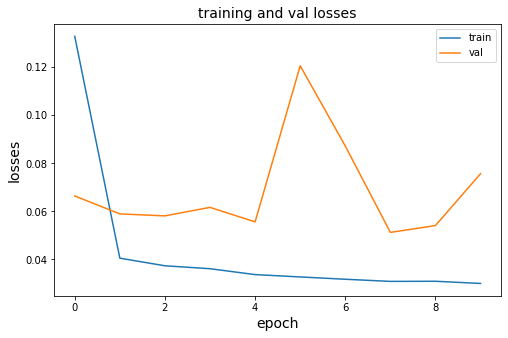

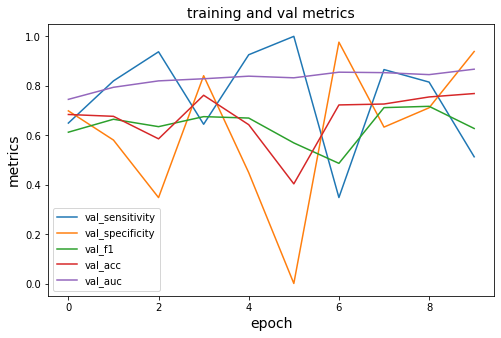

Epoch [10] Learning rate: 0.1


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f71ced59710>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f71ced59710>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/usr/local/l

Epoch: [10][0/804]	Time 1.270 (1.270)	Loss 0.0284 (0.0284)	Sensitivity 1.000 (1.000)	Specificity 0.643 (0.643)	F1 0.878 (0.878)	Accuracy 0.844 (0.844)	
Epoch: [10][10/804]	Time 0.781 (0.826)	Loss 0.0156 (0.0231)	Sensitivity 1.000 (0.970)	Specificity 0.700 (0.701)	F1 0.936 (0.901)	Accuracy 0.906 (0.866)	
Epoch: [10][20/804]	Time 0.788 (0.805)	Loss 0.0281 (0.0265)	Sensitivity 1.000 (0.953)	Specificity 0.667 (0.703)	F1 0.872 (0.897)	Accuracy 0.844 (0.860)	
Epoch: [10][30/804]	Time 0.792 (0.799)	Loss 0.0276 (0.0271)	Sensitivity 0.944 (0.958)	Specificity 0.643 (0.676)	F1 0.850 (0.890)	Accuracy 0.812 (0.852)	
Epoch: [10][40/804]	Time 0.787 (0.796)	Loss 0.0401 (0.0278)	Sensitivity 0.850 (0.952)	Specificity 0.833 (0.698)	F1 0.872 (0.890)	Accuracy 0.844 (0.854)	
Epoch: [10][50/804]	Time 0.782 (0.795)	Loss 0.0319 (0.0280)	Sensitivity 0.905 (0.950)	Specificity 0.909 (0.723)	F1 0.927 (0.895)	Accuracy 0.906 (0.862)	
Epoch: [10][60/804]	Time 0.783 (0.793)	Loss 0.0331 (0.0292)	Sensitivity 0.917 (0.94

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.692 (0.692)	Loss 0.0546 (0.0546)	Sensitivity 0.750 (0.750)	Specificity 0.937 (0.937)	F1 0.828 (0.828)	Accuracy 0.844 (0.844)	
Test: [10/60]	Time 0.243 (0.286)	Loss 0.0506 (0.0633)	Sensitivity 0.846 (0.600)	Specificity 0.789 (0.903)	F1 0.786 (0.676)	Accuracy 0.812 (0.790)	
Test: [20/60]	Time 0.239 (0.263)	Loss 0.0974 (0.0663)	Sensitivity 0.412 (0.562)	Specificity 0.933 (0.905)	F1 0.560 (0.647)	Accuracy 0.656 (0.768)	
Test: [30/60]	Time 0.236 (0.254)	Loss 0.0898 (0.0681)	Sensitivity 0.562 (0.564)	Specificity 1.000 (0.904)	F1 0.720 (0.651)	Accuracy 0.781 (0.764)	
Test: [40/60]	Time 0.241 (0.250)	Loss 0.0527 (0.0668)	Sensitivity 0.833 (0.557)	Specificity 0.850 (0.907)	F1 0.800 (0.642)	Accuracy 0.844 (0.768)	
Test: [50/60]	Time 0.239 (0.248)	Loss 0.0549 (0.0677)	Sensitivity 0.727 (0.569)	Specificity 0.952 (0.908)	F1 0.800 (0.656)	Accuracy 0.875 (0.770)	
 * Sensitivity 0.567 Specificity 0.907 F1 0.652 Acc 0.770 ROC AUC 0.864
Epoch [11] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [11][0/804]	Time 0.969 (0.969)	Loss 0.0373 (0.0373)	Sensitivity 0.864 (0.864)	Specificity 0.600 (0.600)	F1 0.844 (0.844)	Accuracy 0.781 (0.781)	
Epoch: [11][10/804]	Time 0.776 (0.797)	Loss 0.0290 (0.0320)	Sensitivity 1.000 (0.950)	Specificity 0.500 (0.580)	F1 0.870 (0.860)	Accuracy 0.812 (0.810)	
Epoch: [11][20/804]	Time 0.782 (0.790)	Loss 0.0194 (0.0302)	Sensitivity 1.000 (0.954)	Specificity 0.818 (0.668)	F1 0.955 (0.884)	Accuracy 0.938 (0.842)	
Epoch: [11][30/804]	Time 0.783 (0.787)	Loss 0.0301 (0.0287)	Sensitivity 0.955 (0.958)	Specificity 0.600 (0.684)	F1 0.894 (0.895)	Accuracy 0.844 (0.856)	
Epoch: [11][40/804]	Time 0.785 (0.787)	Loss 0.0320 (0.0282)	Sensitivity 0.958 (0.958)	Specificity 0.750 (0.690)	F1 0.939 (0.901)	Accuracy 0.906 (0.863)	
Epoch: [11][50/804]	Time 0.779 (0.786)	Loss 0.0330 (0.0292)	Sensitivity 1.000 (0.962)	Specificity 0.462 (0.642)	F1 0.844 (0.894)	Accuracy 0.781 (0.850)	
Epoch: [11][60/804]	Time 0.780 (0.786)	Loss 0.0301 (0.0285)	Sensitivity 1.000 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.808 (0.808)	Loss 0.0699 (0.0699)	Sensitivity 1.000 (1.000)	Specificity 0.167 (0.167)	F1 0.651 (0.651)	Accuracy 0.531 (0.531)	
Test: [10/60]	Time 0.239 (0.293)	Loss 0.0656 (0.0684)	Sensitivity 1.000 (0.989)	Specificity 0.182 (0.137)	F1 0.526 (0.594)	Accuracy 0.438 (0.474)	
Test: [20/60]	Time 0.240 (0.268)	Loss 0.0855 (0.0702)	Sensitivity 1.000 (0.994)	Specificity 0.174 (0.125)	F1 0.486 (0.582)	Accuracy 0.406 (0.460)	
Test: [30/60]	Time 0.239 (0.258)	Loss 0.0834 (0.0702)	Sensitivity 1.000 (0.996)	Specificity 0.100 (0.122)	F1 0.571 (0.588)	Accuracy 0.438 (0.463)	
Test: [40/60]	Time 0.238 (0.254)	Loss 0.0630 (0.0694)	Sensitivity 1.000 (0.993)	Specificity 0.190 (0.126)	F1 0.564 (0.599)	Accuracy 0.469 (0.473)	
Test: [50/60]	Time 0.239 (0.251)	Loss 0.0572 (0.0698)	Sensitivity 1.000 (0.993)	Specificity 0.125 (0.119)	F1 0.696 (0.599)	Accuracy 0.562 (0.472)	
 * Sensitivity 0.990 Specificity 0.121 F1 0.596 Acc 0.470 ROC AUC 0.836
Epoch [12] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [12][0/804]	Time 1.024 (1.024)	Loss 0.0205 (0.0205)	Sensitivity 1.000 (1.000)	Specificity 0.625 (0.625)	F1 0.941 (0.941)	Accuracy 0.906 (0.906)	
Epoch: [12][10/804]	Time 0.781 (0.805)	Loss 0.0156 (0.0261)	Sensitivity 1.000 (0.984)	Specificity 0.727 (0.656)	F1 0.933 (0.908)	Accuracy 0.906 (0.869)	
Epoch: [12][20/804]	Time 0.782 (0.794)	Loss 0.0220 (0.0257)	Sensitivity 0.955 (0.970)	Specificity 0.700 (0.698)	F1 0.913 (0.911)	Accuracy 0.875 (0.875)	
Epoch: [12][30/804]	Time 0.790 (0.791)	Loss 0.0469 (0.0271)	Sensitivity 0.867 (0.968)	Specificity 0.471 (0.700)	F1 0.703 (0.905)	Accuracy 0.656 (0.870)	
Epoch: [12][40/804]	Time 0.788 (0.789)	Loss 0.0184 (0.0271)	Sensitivity 1.000 (0.967)	Specificity 0.909 (0.704)	F1 0.977 (0.901)	Accuracy 0.969 (0.867)	
Epoch: [12][50/804]	Time 0.781 (0.788)	Loss 0.0142 (0.0280)	Sensitivity 1.000 (0.959)	Specificity 1.000 (0.726)	F1 1.000 (0.902)	Accuracy 1.000 (0.870)	
Epoch: [12][60/804]	Time 0.787 (0.787)	Loss 0.0295 (0.0285)	Sensitivity 1.000 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.875 (0.875)	Loss 0.0399 (0.0399)	Sensitivity 1.000 (1.000)	Specificity 0.667 (0.667)	F1 0.759 (0.759)	Accuracy 0.781 (0.781)	
Test: [10/60]	Time 0.235 (0.296)	Loss 0.0439 (0.0482)	Sensitivity 0.917 (0.902)	Specificity 0.700 (0.643)	F1 0.759 (0.702)	Accuracy 0.781 (0.736)	
Test: [20/60]	Time 0.240 (0.268)	Loss 0.0346 (0.0473)	Sensitivity 1.000 (0.895)	Specificity 0.619 (0.630)	F1 0.733 (0.722)	Accuracy 0.750 (0.734)	
Test: [30/60]	Time 0.237 (0.258)	Loss 0.0470 (0.0461)	Sensitivity 0.882 (0.906)	Specificity 0.667 (0.647)	F1 0.811 (0.743)	Accuracy 0.781 (0.752)	
Test: [40/60]	Time 0.236 (0.253)	Loss 0.0488 (0.0463)	Sensitivity 0.882 (0.917)	Specificity 0.800 (0.644)	F1 0.857 (0.742)	Accuracy 0.844 (0.752)	
Test: [50/60]	Time 0.236 (0.250)	Loss 0.0369 (0.0466)	Sensitivity 0.917 (0.908)	Specificity 0.650 (0.650)	F1 0.733 (0.744)	Accuracy 0.750 (0.753)	
 * Sensitivity 0.905 Specificity 0.650 F1 0.739 Acc 0.752 ROC AUC 0.885
Epoch [13] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [13][0/804]	Time 0.987 (0.987)	Loss 0.0289 (0.0289)	Sensitivity 1.000 (1.000)	Specificity 0.533 (0.533)	F1 0.829 (0.829)	Accuracy 0.781 (0.781)	
Epoch: [13][10/804]	Time 0.781 (0.802)	Loss 0.0210 (0.0274)	Sensitivity 0.958 (0.966)	Specificity 0.875 (0.646)	F1 0.958 (0.886)	Accuracy 0.938 (0.844)	
Epoch: [13][20/804]	Time 0.782 (0.793)	Loss 0.0238 (0.0264)	Sensitivity 1.000 (0.968)	Specificity 0.750 (0.668)	F1 0.930 (0.897)	Accuracy 0.906 (0.857)	
Epoch: [13][30/804]	Time 0.787 (0.790)	Loss 0.0294 (0.0263)	Sensitivity 1.000 (0.971)	Specificity 0.583 (0.668)	F1 0.889 (0.902)	Accuracy 0.844 (0.862)	
Epoch: [13][40/804]	Time 0.782 (0.789)	Loss 0.0280 (0.0270)	Sensitivity 0.947 (0.969)	Specificity 0.615 (0.661)	F1 0.857 (0.898)	Accuracy 0.812 (0.857)	
Epoch: [13][50/804]	Time 0.787 (0.788)	Loss 0.0260 (0.0271)	Sensitivity 1.000 (0.968)	Specificity 0.500 (0.662)	F1 0.800 (0.895)	Accuracy 0.750 (0.854)	
Epoch: [13][60/804]	Time 0.787 (0.788)	Loss 0.0278 (0.0272)	Sensitivity 0.952 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.866 (0.866)	Loss 0.0319 (0.0319)	Sensitivity 0.818 (0.818)	Specificity 0.810 (0.810)	F1 0.750 (0.750)	Accuracy 0.812 (0.812)	
Test: [10/60]	Time 0.237 (0.296)	Loss 0.0724 (0.0480)	Sensitivity 0.722 (0.769)	Specificity 0.714 (0.837)	F1 0.743 (0.758)	Accuracy 0.719 (0.812)	
Test: [20/60]	Time 0.236 (0.268)	Loss 0.0489 (0.0502)	Sensitivity 0.667 (0.789)	Specificity 0.900 (0.833)	F1 0.727 (0.778)	Accuracy 0.812 (0.818)	
Test: [30/60]	Time 0.238 (0.258)	Loss 0.0406 (0.0514)	Sensitivity 1.000 (0.771)	Specificity 0.706 (0.833)	F1 0.857 (0.765)	Accuracy 0.844 (0.812)	
Test: [40/60]	Time 0.236 (0.253)	Loss 0.0362 (0.0521)	Sensitivity 0.833 (0.766)	Specificity 0.900 (0.830)	F1 0.833 (0.755)	Accuracy 0.875 (0.806)	
Test: [50/60]	Time 0.236 (0.249)	Loss 0.0572 (0.0529)	Sensitivity 0.583 (0.747)	Specificity 0.850 (0.836)	F1 0.636 (0.745)	Accuracy 0.750 (0.801)	
 * Sensitivity 0.740 Specificity 0.844 F1 0.743 Acc 0.804 ROC AUC 0.884
Epoch [14] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [14][0/804]	Time 0.991 (0.991)	Loss 0.0214 (0.0214)	Sensitivity 1.000 (1.000)	Specificity 0.818 (0.818)	F1 0.955 (0.955)	Accuracy 0.938 (0.938)	
Epoch: [14][10/804]	Time 0.787 (0.799)	Loss 0.0295 (0.0296)	Sensitivity 0.941 (0.950)	Specificity 0.867 (0.779)	F1 0.914 (0.898)	Accuracy 0.906 (0.869)	
Epoch: [14][20/804]	Time 0.787 (0.791)	Loss 0.0301 (0.0279)	Sensitivity 0.941 (0.946)	Specificity 0.667 (0.800)	F1 0.842 (0.911)	Accuracy 0.812 (0.884)	
Epoch: [14][30/804]	Time 0.780 (0.788)	Loss 0.0160 (0.0278)	Sensitivity 1.000 (0.953)	Specificity 0.571 (0.742)	F1 0.943 (0.898)	Accuracy 0.906 (0.866)	
Epoch: [14][40/804]	Time 0.780 (0.787)	Loss 0.0315 (0.0276)	Sensitivity 0.917 (0.956)	Specificity 0.750 (0.726)	F1 0.917 (0.900)	Accuracy 0.875 (0.866)	
Epoch: [14][50/804]	Time 0.784 (0.786)	Loss 0.0363 (0.0277)	Sensitivity 0.870 (0.957)	Specificity 0.778 (0.713)	F1 0.889 (0.899)	Accuracy 0.844 (0.864)	
Epoch: [14][60/804]	Time 0.779 (0.786)	Loss 0.0211 (0.0274)	Sensitivity 1.000 (0.95

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.877 (0.877)	Loss 0.0369 (0.0369)	Sensitivity 1.000 (1.000)	Specificity 0.550 (0.550)	F1 0.727 (0.727)	Accuracy 0.719 (0.719)	
Test: [10/60]	Time 0.237 (0.297)	Loss 0.0478 (0.0436)	Sensitivity 1.000 (0.952)	Specificity 0.500 (0.556)	F1 0.870 (0.670)	Accuracy 0.812 (0.696)	
Test: [20/60]	Time 0.240 (0.269)	Loss 0.0562 (0.0436)	Sensitivity 0.929 (0.958)	Specificity 0.500 (0.556)	F1 0.722 (0.703)	Accuracy 0.688 (0.708)	
Test: [30/60]	Time 0.235 (0.259)	Loss 0.0538 (0.0446)	Sensitivity 0.933 (0.954)	Specificity 0.412 (0.550)	F1 0.718 (0.716)	Accuracy 0.656 (0.712)	
Test: [40/60]	Time 0.238 (0.254)	Loss 0.0562 (0.0462)	Sensitivity 0.917 (0.947)	Specificity 0.450 (0.542)	F1 0.647 (0.718)	Accuracy 0.625 (0.708)	
Test: [50/60]	Time 0.237 (0.251)	Loss 0.0519 (0.0468)	Sensitivity 1.000 (0.941)	Specificity 0.421 (0.535)	F1 0.703 (0.710)	Accuracy 0.656 (0.700)	
 * Sensitivity 0.943 Specificity 0.542 F1 0.715 Acc 0.705 ROC AUC 0.889
Epoch [15] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [15][0/804]	Time 0.943 (0.943)	Loss 0.0198 (0.0198)	Sensitivity 1.000 (1.000)	Specificity 0.846 (0.846)	F1 0.950 (0.950)	Accuracy 0.938 (0.938)	
Epoch: [15][10/804]	Time 0.784 (0.798)	Loss 0.0417 (0.0316)	Sensitivity 0.864 (0.934)	Specificity 0.600 (0.700)	F1 0.844 (0.887)	Accuracy 0.781 (0.847)	
Epoch: [15][20/804]	Time 0.780 (0.791)	Loss 0.0314 (0.0307)	Sensitivity 1.000 (0.952)	Specificity 0.385 (0.609)	F1 0.826 (0.877)	Accuracy 0.750 (0.827)	
Epoch: [15][30/804]	Time 0.779 (0.789)	Loss 0.0310 (0.0304)	Sensitivity 1.000 (0.959)	Specificity 0.667 (0.621)	F1 0.909 (0.877)	Accuracy 0.875 (0.830)	
Epoch: [15][40/804]	Time 0.782 (0.788)	Loss 0.0271 (0.0291)	Sensitivity 0.909 (0.956)	Specificity 0.800 (0.666)	F1 0.909 (0.887)	Accuracy 0.875 (0.845)	
Epoch: [15][50/804]	Time 0.786 (0.788)	Loss 0.0394 (0.0286)	Sensitivity 0.955 (0.958)	Specificity 0.300 (0.666)	F1 0.840 (0.890)	Accuracy 0.750 (0.849)	
Epoch: [15][60/804]	Time 0.781 (0.787)	Loss 0.0275 (0.0281)	Sensitivity 1.000 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.891 (0.891)	Loss 0.0453 (0.0453)	Sensitivity 0.800 (0.800)	Specificity 0.636 (0.636)	F1 0.615 (0.615)	Accuracy 0.688 (0.688)	
Test: [10/60]	Time 0.236 (0.298)	Loss 0.0426 (0.0424)	Sensitivity 0.917 (0.913)	Specificity 0.650 (0.690)	F1 0.733 (0.747)	Accuracy 0.750 (0.773)	
Test: [20/60]	Time 0.236 (0.269)	Loss 0.0894 (0.0462)	Sensitivity 0.824 (0.898)	Specificity 0.400 (0.680)	F1 0.700 (0.743)	Accuracy 0.625 (0.763)	
Test: [30/60]	Time 0.237 (0.259)	Loss 0.0495 (0.0478)	Sensitivity 0.812 (0.875)	Specificity 0.812 (0.691)	F1 0.812 (0.738)	Accuracy 0.812 (0.762)	
Test: [40/60]	Time 0.235 (0.253)	Loss 0.0326 (0.0473)	Sensitivity 1.000 (0.880)	Specificity 0.750 (0.679)	F1 0.727 (0.736)	Accuracy 0.812 (0.758)	
Test: [50/60]	Time 0.238 (0.250)	Loss 0.0502 (0.0472)	Sensitivity 0.765 (0.881)	Specificity 0.800 (0.683)	F1 0.788 (0.743)	Accuracy 0.781 (0.761)	
 * Sensitivity 0.889 Specificity 0.679 F1 0.748 Acc 0.764 ROC AUC 0.886
Epoch [16] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [16][0/804]	Time 0.956 (0.956)	Loss 0.0112 (0.0112)	Sensitivity 1.000 (1.000)	Specificity 0.800 (0.800)	F1 0.957 (0.957)	Accuracy 0.938 (0.938)	
Epoch: [16][10/804]	Time 0.780 (0.796)	Loss 0.0253 (0.0257)	Sensitivity 0.950 (0.965)	Specificity 0.833 (0.705)	F1 0.927 (0.898)	Accuracy 0.906 (0.864)	
Epoch: [16][20/804]	Time 0.782 (0.789)	Loss 0.0348 (0.0268)	Sensitivity 0.840 (0.959)	Specificity 1.000 (0.721)	F1 0.913 (0.890)	Accuracy 0.875 (0.859)	
Epoch: [16][30/804]	Time 0.787 (0.787)	Loss 0.0347 (0.0276)	Sensitivity 1.000 (0.954)	Specificity 0.500 (0.730)	F1 0.800 (0.896)	Accuracy 0.750 (0.863)	
Epoch: [16][40/804]	Time 0.787 (0.786)	Loss 0.0211 (0.0263)	Sensitivity 0.947 (0.961)	Specificity 0.692 (0.722)	F1 0.878 (0.897)	Accuracy 0.844 (0.864)	
Epoch: [16][50/804]	Time 0.785 (0.785)	Loss 0.0291 (0.0266)	Sensitivity 1.000 (0.962)	Specificity 0.583 (0.722)	F1 0.889 (0.896)	Accuracy 0.844 (0.863)	
Epoch: [16][60/804]	Time 0.780 (0.785)	Loss 0.0271 (0.0266)	Sensitivity 1.000 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.885 (0.885)	Loss 0.1283 (0.1283)	Sensitivity 0.143 (0.143)	Specificity 1.000 (1.000)	F1 0.250 (0.250)	Accuracy 0.625 (0.625)	
Test: [10/60]	Time 0.237 (0.298)	Loss 0.1326 (0.0956)	Sensitivity 0.200 (0.387)	Specificity 0.941 (0.970)	F1 0.316 (0.521)	Accuracy 0.594 (0.733)	
Test: [20/60]	Time 0.238 (0.269)	Loss 0.0930 (0.0984)	Sensitivity 0.615 (0.402)	Specificity 1.000 (0.982)	F1 0.762 (0.543)	Accuracy 0.844 (0.744)	
Test: [30/60]	Time 0.238 (0.259)	Loss 0.1075 (0.1007)	Sensitivity 0.400 (0.390)	Specificity 0.955 (0.980)	F1 0.533 (0.531)	Accuracy 0.781 (0.740)	
Test: [40/60]	Time 0.238 (0.254)	Loss 0.1233 (0.1015)	Sensitivity 0.385 (0.388)	Specificity 0.947 (0.979)	F1 0.526 (0.530)	Accuracy 0.719 (0.738)	
Test: [50/60]	Time 0.234 (0.251)	Loss 0.1148 (0.1010)	Sensitivity 0.500 (0.374)	Specificity 0.937 (0.977)	F1 0.640 (0.512)	Accuracy 0.719 (0.737)	
 * Sensitivity 0.375 Specificity 0.978 F1 0.515 Acc 0.736 ROC AUC 0.882
Epoch [17] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [17][0/804]	Time 0.977 (0.977)	Loss 0.0309 (0.0309)	Sensitivity 0.895 (0.895)	Specificity 0.615 (0.615)	F1 0.829 (0.829)	Accuracy 0.781 (0.781)	
Epoch: [17][10/804]	Time 0.778 (0.800)	Loss 0.0410 (0.0281)	Sensitivity 0.947 (0.969)	Specificity 0.615 (0.690)	F1 0.857 (0.898)	Accuracy 0.812 (0.864)	
Epoch: [17][20/804]	Time 0.786 (0.792)	Loss 0.0462 (0.0287)	Sensitivity 0.917 (0.974)	Specificity 0.650 (0.726)	F1 0.733 (0.898)	Accuracy 0.750 (0.872)	
Epoch: [17][30/804]	Time 0.789 (0.790)	Loss 0.0210 (0.0279)	Sensitivity 1.000 (0.966)	Specificity 0.600 (0.760)	F1 0.850 (0.906)	Accuracy 0.812 (0.882)	
Epoch: [17][40/804]	Time 0.783 (0.789)	Loss 0.0198 (0.0270)	Sensitivity 0.952 (0.968)	Specificity 0.727 (0.756)	F1 0.909 (0.908)	Accuracy 0.875 (0.883)	
Epoch: [17][50/804]	Time 0.780 (0.788)	Loss 0.0329 (0.0263)	Sensitivity 1.000 (0.971)	Specificity 0.385 (0.740)	F1 0.826 (0.908)	Accuracy 0.750 (0.881)	
Epoch: [17][60/804]	Time 0.792 (0.788)	Loss 0.0137 (0.0258)	Sensitivity 1.000 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.771 (0.771)	Loss 0.0461 (0.0461)	Sensitivity 0.857 (0.857)	Specificity 0.722 (0.722)	F1 0.774 (0.774)	Accuracy 0.781 (0.781)	
Test: [10/60]	Time 0.236 (0.288)	Loss 0.0482 (0.0544)	Sensitivity 0.882 (0.789)	Specificity 0.800 (0.703)	F1 0.857 (0.713)	Accuracy 0.844 (0.741)	
Test: [20/60]	Time 0.236 (0.264)	Loss 0.0381 (0.0519)	Sensitivity 0.933 (0.818)	Specificity 0.824 (0.697)	F1 0.875 (0.722)	Accuracy 0.875 (0.750)	
Test: [30/60]	Time 0.233 (0.255)	Loss 0.0464 (0.0498)	Sensitivity 0.923 (0.843)	Specificity 0.789 (0.700)	F1 0.828 (0.735)	Accuracy 0.844 (0.761)	
Test: [40/60]	Time 0.236 (0.251)	Loss 0.0484 (0.0483)	Sensitivity 0.846 (0.859)	Specificity 0.632 (0.703)	F1 0.710 (0.741)	Accuracy 0.719 (0.767)	
Test: [50/60]	Time 0.237 (0.248)	Loss 0.0608 (0.0489)	Sensitivity 0.692 (0.853)	Specificity 0.684 (0.705)	F1 0.643 (0.739)	Accuracy 0.688 (0.766)	
 * Sensitivity 0.855 Specificity 0.721 F1 0.747 Acc 0.776 ROC AUC 0.884
Epoch [18] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [18][0/804]	Time 0.988 (0.988)	Loss 0.0342 (0.0342)	Sensitivity 0.941 (0.941)	Specificity 0.533 (0.533)	F1 0.800 (0.800)	Accuracy 0.750 (0.750)	
Epoch: [18][10/804]	Time 0.776 (0.799)	Loss 0.0336 (0.0324)	Sensitivity 0.952 (0.949)	Specificity 0.455 (0.633)	F1 0.851 (0.882)	Accuracy 0.781 (0.838)	
Epoch: [18][20/804]	Time 0.779 (0.790)	Loss 0.0318 (0.0302)	Sensitivity 0.955 (0.969)	Specificity 0.800 (0.625)	F1 0.933 (0.890)	Accuracy 0.906 (0.847)	
Epoch: [18][30/804]	Time 0.781 (0.787)	Loss 0.0287 (0.0285)	Sensitivity 0.944 (0.972)	Specificity 0.643 (0.646)	F1 0.850 (0.895)	Accuracy 0.812 (0.855)	
Epoch: [18][40/804]	Time 0.778 (0.786)	Loss 0.0214 (0.0271)	Sensitivity 1.000 (0.975)	Specificity 0.692 (0.664)	F1 0.905 (0.898)	Accuracy 0.875 (0.861)	
Epoch: [18][50/804]	Time 0.780 (0.785)	Loss 0.0260 (0.0270)	Sensitivity 0.937 (0.970)	Specificity 0.625 (0.692)	F1 0.811 (0.900)	Accuracy 0.781 (0.865)	
Epoch: [18][60/804]	Time 0.785 (0.784)	Loss 0.0252 (0.0274)	Sensitivity 0.957 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.910 (0.910)	Loss 0.0516 (0.0516)	Sensitivity 0.667 (0.667)	Specificity 0.750 (0.750)	F1 0.640 (0.640)	Accuracy 0.719 (0.719)	
Test: [10/60]	Time 0.237 (0.298)	Loss 0.0505 (0.0485)	Sensitivity 0.750 (0.782)	Specificity 0.800 (0.817)	F1 0.720 (0.762)	Accuracy 0.781 (0.804)	
Test: [20/60]	Time 0.231 (0.268)	Loss 0.0532 (0.0472)	Sensitivity 0.769 (0.802)	Specificity 0.789 (0.799)	F1 0.741 (0.761)	Accuracy 0.781 (0.801)	
Test: [30/60]	Time 0.236 (0.258)	Loss 0.0432 (0.0476)	Sensitivity 0.625 (0.781)	Specificity 0.917 (0.820)	F1 0.667 (0.754)	Accuracy 0.844 (0.807)	
Test: [40/60]	Time 0.237 (0.253)	Loss 0.0460 (0.0483)	Sensitivity 0.786 (0.787)	Specificity 0.889 (0.828)	F1 0.815 (0.767)	Accuracy 0.844 (0.813)	
Test: [50/60]	Time 0.236 (0.250)	Loss 0.0653 (0.0477)	Sensitivity 0.714 (0.785)	Specificity 0.722 (0.832)	F1 0.690 (0.766)	Accuracy 0.719 (0.816)	
 * Sensitivity 0.785 Specificity 0.826 F1 0.765 Acc 0.812 ROC AUC 0.897
Epoch [19] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [19][0/804]	Time 0.992 (0.992)	Loss 0.0217 (0.0217)	Sensitivity 0.958 (0.958)	Specificity 0.750 (0.750)	F1 0.939 (0.939)	Accuracy 0.906 (0.906)	
Epoch: [19][10/804]	Time 0.776 (0.800)	Loss 0.0362 (0.0246)	Sensitivity 1.000 (0.965)	Specificity 0.500 (0.735)	F1 0.800 (0.908)	Accuracy 0.750 (0.878)	
Epoch: [19][20/804]	Time 0.783 (0.791)	Loss 0.0239 (0.0270)	Sensitivity 1.000 (0.964)	Specificity 0.687 (0.673)	F1 0.865 (0.895)	Accuracy 0.844 (0.857)	
Epoch: [19][30/804]	Time 0.784 (0.788)	Loss 0.0258 (0.0268)	Sensitivity 1.000 (0.960)	Specificity 0.583 (0.708)	F1 0.889 (0.903)	Accuracy 0.844 (0.868)	
Epoch: [19][40/804]	Time 0.787 (0.787)	Loss 0.0370 (0.0263)	Sensitivity 1.000 (0.964)	Specificity 0.333 (0.712)	F1 0.773 (0.904)	Accuracy 0.688 (0.870)	
Epoch: [19][50/804]	Time 0.780 (0.786)	Loss 0.0094 (0.0257)	Sensitivity 1.000 (0.966)	Specificity 1.000 (0.719)	F1 1.000 (0.905)	Accuracy 1.000 (0.871)	
Epoch: [19][60/804]	Time 0.780 (0.785)	Loss 0.0209 (0.0257)	Sensitivity 0.957 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.841 (0.841)	Loss 0.0407 (0.0407)	Sensitivity 1.000 (1.000)	Specificity 0.467 (0.467)	F1 0.810 (0.810)	Accuracy 0.750 (0.750)	
Test: [10/60]	Time 0.236 (0.295)	Loss 0.0344 (0.0438)	Sensitivity 1.000 (0.943)	Specificity 0.583 (0.582)	F1 0.615 (0.731)	Accuracy 0.688 (0.727)	
Test: [20/60]	Time 0.236 (0.267)	Loss 0.0422 (0.0448)	Sensitivity 0.818 (0.923)	Specificity 0.762 (0.596)	F1 0.720 (0.719)	Accuracy 0.781 (0.726)	
Test: [30/60]	Time 0.235 (0.258)	Loss 0.0356 (0.0448)	Sensitivity 1.000 (0.928)	Specificity 0.588 (0.601)	F1 0.811 (0.722)	Accuracy 0.781 (0.730)	
Test: [40/60]	Time 0.236 (0.253)	Loss 0.0369 (0.0457)	Sensitivity 1.000 (0.929)	Specificity 0.737 (0.606)	F1 0.839 (0.736)	Accuracy 0.844 (0.737)	
Test: [50/60]	Time 0.237 (0.250)	Loss 0.0663 (0.0460)	Sensitivity 0.846 (0.923)	Specificity 0.421 (0.601)	F1 0.629 (0.730)	Accuracy 0.594 (0.734)	
 * Sensitivity 0.925 Specificity 0.616 F1 0.735 Acc 0.742 ROC AUC 0.891
*******************PLOT HERE*******************

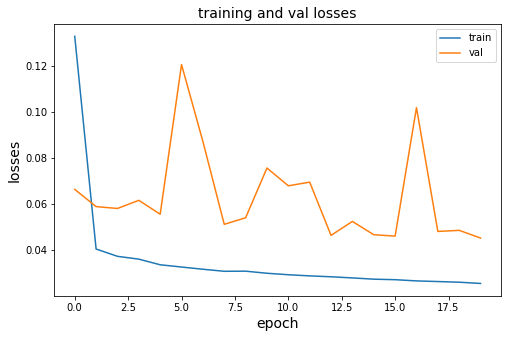

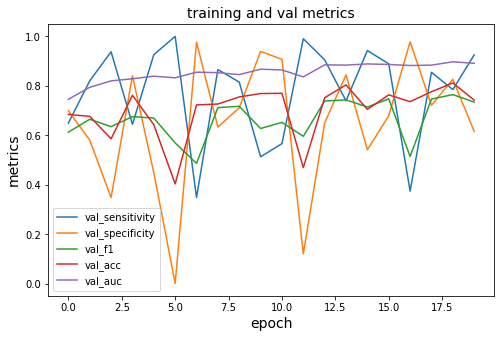

Epoch [20] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [20][0/804]	Time 1.138 (1.138)	Loss 0.0232 (0.0232)	Sensitivity 1.000 (1.000)	Specificity 0.636 (0.636)	F1 0.913 (0.913)	Accuracy 0.875 (0.875)	
Epoch: [20][10/804]	Time 0.783 (0.810)	Loss 0.0244 (0.0286)	Sensitivity 0.950 (0.968)	Specificity 0.833 (0.715)	F1 0.927 (0.905)	Accuracy 0.906 (0.872)	
Epoch: [20][20/804]	Time 0.782 (0.797)	Loss 0.0310 (0.0269)	Sensitivity 1.000 (0.971)	Specificity 0.462 (0.720)	F1 0.844 (0.911)	Accuracy 0.781 (0.876)	
Epoch: [20][30/804]	Time 0.778 (0.792)	Loss 0.0174 (0.0259)	Sensitivity 1.000 (0.972)	Specificity 0.875 (0.714)	F1 0.980 (0.909)	Accuracy 0.969 (0.875)	
Epoch: [20][40/804]	Time 0.787 (0.791)	Loss 0.0216 (0.0268)	Sensitivity 1.000 (0.964)	Specificity 0.667 (0.702)	F1 0.939 (0.902)	Accuracy 0.906 (0.867)	
Epoch: [20][50/804]	Time 0.792 (0.790)	Loss 0.0190 (0.0262)	Sensitivity 1.000 (0.967)	Specificity 0.545 (0.693)	F1 0.894 (0.907)	Accuracy 0.844 (0.871)	
Epoch: [20][60/804]	Time 0.780 (0.789)	Loss 0.0253 (0.0266)	Sensitivity 1.000 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.856 (0.856)	Loss 0.0520 (0.0520)	Sensitivity 0.800 (0.800)	Specificity 0.588 (0.588)	F1 0.706 (0.706)	Accuracy 0.688 (0.688)	
Test: [10/60]	Time 0.237 (0.296)	Loss 0.0473 (0.0510)	Sensitivity 0.750 (0.876)	Specificity 0.800 (0.694)	F1 0.720 (0.762)	Accuracy 0.781 (0.773)	
Test: [20/60]	Time 0.237 (0.268)	Loss 0.0418 (0.0506)	Sensitivity 0.889 (0.882)	Specificity 0.739 (0.687)	F1 0.696 (0.732)	Accuracy 0.781 (0.760)	
Test: [30/60]	Time 0.238 (0.258)	Loss 0.0464 (0.0498)	Sensitivity 1.000 (0.885)	Specificity 0.720 (0.708)	F1 0.667 (0.743)	Accuracy 0.781 (0.775)	
Test: [40/60]	Time 0.240 (0.253)	Loss 0.0668 (0.0475)	Sensitivity 0.909 (0.896)	Specificity 0.619 (0.715)	F1 0.690 (0.759)	Accuracy 0.719 (0.786)	
Test: [50/60]	Time 0.237 (0.250)	Loss 0.0532 (0.0471)	Sensitivity 0.923 (0.902)	Specificity 0.526 (0.707)	F1 0.706 (0.766)	Accuracy 0.688 (0.786)	
 * Sensitivity 0.895 Specificity 0.708 F1 0.762 Acc 0.784 ROC AUC 0.897
Epoch [21] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [21][0/804]	Time 0.973 (0.973)	Loss 0.0151 (0.0151)	Sensitivity 1.000 (1.000)	Specificity 0.727 (0.727)	F1 0.933 (0.933)	Accuracy 0.906 (0.906)	
Epoch: [21][10/804]	Time 0.787 (0.801)	Loss 0.0148 (0.0211)	Sensitivity 1.000 (0.981)	Specificity 0.909 (0.713)	F1 0.977 (0.932)	Accuracy 0.969 (0.901)	
Epoch: [21][20/804]	Time 0.789 (0.792)	Loss 0.0218 (0.0232)	Sensitivity 0.950 (0.981)	Specificity 0.833 (0.707)	F1 0.927 (0.917)	Accuracy 0.906 (0.885)	
Epoch: [21][30/804]	Time 0.782 (0.789)	Loss 0.0224 (0.0243)	Sensitivity 1.000 (0.970)	Specificity 0.889 (0.753)	F1 0.979 (0.921)	Accuracy 0.969 (0.893)	
Epoch: [21][40/804]	Time 0.780 (0.788)	Loss 0.0190 (0.0239)	Sensitivity 0.952 (0.972)	Specificity 0.818 (0.736)	F1 0.930 (0.918)	Accuracy 0.906 (0.889)	
Epoch: [21][50/804]	Time 0.779 (0.787)	Loss 0.0314 (0.0238)	Sensitivity 0.875 (0.970)	Specificity 0.875 (0.739)	F1 0.913 (0.918)	Accuracy 0.875 (0.888)	
Epoch: [21][60/804]	Time 0.781 (0.786)	Loss 0.0146 (0.0233)	Sensitivity 1.000 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.769 (0.769)	Loss 0.0489 (0.0489)	Sensitivity 0.750 (0.750)	Specificity 0.750 (0.750)	F1 0.692 (0.692)	Accuracy 0.750 (0.750)	
Test: [10/60]	Time 0.235 (0.288)	Loss 0.0388 (0.0451)	Sensitivity 0.750 (0.793)	Specificity 0.833 (0.780)	F1 0.667 (0.720)	Accuracy 0.812 (0.787)	
Test: [20/60]	Time 0.235 (0.263)	Loss 0.0485 (0.0440)	Sensitivity 0.857 (0.809)	Specificity 0.667 (0.783)	F1 0.750 (0.748)	Accuracy 0.750 (0.796)	
Test: [30/60]	Time 0.238 (0.255)	Loss 0.0596 (0.0448)	Sensitivity 0.615 (0.800)	Specificity 0.789 (0.796)	F1 0.640 (0.749)	Accuracy 0.719 (0.800)	
Test: [40/60]	Time 0.237 (0.250)	Loss 0.0423 (0.0457)	Sensitivity 0.833 (0.803)	Specificity 0.900 (0.782)	F1 0.833 (0.750)	Accuracy 0.875 (0.793)	
Test: [50/60]	Time 0.237 (0.248)	Loss 0.0424 (0.0452)	Sensitivity 0.818 (0.816)	Specificity 0.905 (0.787)	F1 0.818 (0.762)	Accuracy 0.875 (0.801)	
 * Sensitivity 0.820 Specificity 0.791 F1 0.767 Acc 0.805 ROC AUC 0.902
Epoch [22] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [22][0/804]	Time 1.000 (1.000)	Loss 0.0272 (0.0272)	Sensitivity 0.850 (0.850)	Specificity 0.750 (0.750)	F1 0.850 (0.850)	Accuracy 0.812 (0.812)	
Epoch: [22][10/804]	Time 0.772 (0.796)	Loss 0.0145 (0.0238)	Sensitivity 1.000 (0.941)	Specificity 0.900 (0.817)	F1 0.978 (0.921)	Accuracy 0.969 (0.895)	
Epoch: [22][20/804]	Time 0.792 (0.790)	Loss 0.0367 (0.0238)	Sensitivity 1.000 (0.960)	Specificity 0.412 (0.745)	F1 0.750 (0.910)	Accuracy 0.688 (0.878)	
Epoch: [22][30/804]	Time 0.789 (0.790)	Loss 0.0200 (0.0236)	Sensitivity 1.000 (0.966)	Specificity 0.857 (0.738)	F1 0.980 (0.910)	Accuracy 0.969 (0.879)	
Epoch: [22][40/804]	Time 0.790 (0.790)	Loss 0.0292 (0.0246)	Sensitivity 0.947 (0.964)	Specificity 0.538 (0.729)	F1 0.837 (0.907)	Accuracy 0.781 (0.875)	
Epoch: [22][50/804]	Time 0.788 (0.790)	Loss 0.0289 (0.0249)	Sensitivity 0.960 (0.965)	Specificity 0.857 (0.736)	F1 0.960 (0.909)	Accuracy 0.938 (0.878)	
Epoch: [22][60/804]	Time 0.780 (0.789)	Loss 0.0213 (0.0245)	Sensitivity 0.955 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.746 (0.746)	Loss 0.0358 (0.0358)	Sensitivity 0.800 (0.800)	Specificity 0.864 (0.864)	F1 0.762 (0.762)	Accuracy 0.844 (0.844)	
Test: [10/60]	Time 0.235 (0.285)	Loss 0.0248 (0.0445)	Sensitivity 0.923 (0.846)	Specificity 0.895 (0.750)	F1 0.889 (0.760)	Accuracy 0.906 (0.790)	
Test: [20/60]	Time 0.237 (0.262)	Loss 0.0460 (0.0433)	Sensitivity 1.000 (0.872)	Specificity 0.789 (0.757)	F1 0.867 (0.777)	Accuracy 0.875 (0.802)	
Test: [30/60]	Time 0.239 (0.254)	Loss 0.0555 (0.0425)	Sensitivity 0.818 (0.875)	Specificity 0.667 (0.757)	F1 0.667 (0.773)	Accuracy 0.719 (0.803)	
Test: [40/60]	Time 0.236 (0.250)	Loss 0.0724 (0.0442)	Sensitivity 0.714 (0.860)	Specificity 0.667 (0.752)	F1 0.667 (0.762)	Accuracy 0.688 (0.794)	
Test: [50/60]	Time 0.236 (0.247)	Loss 0.0462 (0.0433)	Sensitivity 0.917 (0.867)	Specificity 0.650 (0.755)	F1 0.733 (0.766)	Accuracy 0.750 (0.798)	
 * Sensitivity 0.868 Specificity 0.755 F1 0.771 Acc 0.800 ROC AUC 0.906
Epoch [23] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [23][0/804]	Time 0.981 (0.981)	Loss 0.0330 (0.0330)	Sensitivity 0.947 (0.947)	Specificity 0.692 (0.692)	F1 0.878 (0.878)	Accuracy 0.844 (0.844)	
Epoch: [23][10/804]	Time 0.777 (0.798)	Loss 0.0279 (0.0252)	Sensitivity 1.000 (0.966)	Specificity 0.687 (0.756)	F1 0.865 (0.924)	Accuracy 0.844 (0.895)	
Epoch: [23][20/804]	Time 0.776 (0.789)	Loss 0.0232 (0.0235)	Sensitivity 1.000 (0.971)	Specificity 0.769 (0.754)	F1 0.927 (0.929)	Accuracy 0.906 (0.899)	
Epoch: [23][30/804]	Time 0.790 (0.787)	Loss 0.0316 (0.0243)	Sensitivity 0.895 (0.971)	Specificity 0.692 (0.735)	F1 0.850 (0.918)	Accuracy 0.812 (0.887)	
Epoch: [23][40/804]	Time 0.780 (0.786)	Loss 0.0191 (0.0249)	Sensitivity 1.000 (0.969)	Specificity 0.818 (0.727)	F1 0.955 (0.916)	Accuracy 0.938 (0.884)	
Epoch: [23][50/804]	Time 0.781 (0.785)	Loss 0.0350 (0.0257)	Sensitivity 0.952 (0.967)	Specificity 0.636 (0.719)	F1 0.889 (0.910)	Accuracy 0.844 (0.877)	
Epoch: [23][60/804]	Time 0.782 (0.785)	Loss 0.0122 (0.0248)	Sensitivity 1.000 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.786 (0.786)	Loss 0.0506 (0.0506)	Sensitivity 0.933 (0.933)	Specificity 0.647 (0.647)	F1 0.800 (0.800)	Accuracy 0.781 (0.781)	
Test: [10/60]	Time 0.236 (0.291)	Loss 0.0442 (0.0543)	Sensitivity 1.000 (0.941)	Specificity 0.562 (0.563)	F1 0.821 (0.729)	Accuracy 0.781 (0.722)	
Test: [20/60]	Time 0.237 (0.265)	Loss 0.0411 (0.0519)	Sensitivity 0.917 (0.927)	Specificity 0.600 (0.573)	F1 0.710 (0.713)	Accuracy 0.719 (0.714)	
Test: [30/60]	Time 0.236 (0.256)	Loss 0.0460 (0.0504)	Sensitivity 1.000 (0.943)	Specificity 0.591 (0.570)	F1 0.690 (0.719)	Accuracy 0.719 (0.719)	
Test: [40/60]	Time 0.235 (0.251)	Loss 0.0588 (0.0496)	Sensitivity 0.812 (0.943)	Specificity 0.437 (0.581)	F1 0.684 (0.728)	Accuracy 0.625 (0.726)	
Test: [50/60]	Time 0.238 (0.249)	Loss 0.0456 (0.0497)	Sensitivity 1.000 (0.944)	Specificity 0.526 (0.583)	F1 0.743 (0.730)	Accuracy 0.719 (0.728)	
 * Sensitivity 0.942 Specificity 0.574 F1 0.725 Acc 0.722 ROC AUC 0.892
Epoch [24] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [24][0/804]	Time 0.949 (0.949)	Loss 0.0738 (0.0738)	Sensitivity 0.792 (0.792)	Specificity 0.625 (0.625)	F1 0.826 (0.826)	Accuracy 0.750 (0.750)	
Epoch: [24][10/804]	Time 0.782 (0.793)	Loss 0.0206 (0.0271)	Sensitivity 1.000 (0.969)	Specificity 0.667 (0.738)	F1 0.939 (0.912)	Accuracy 0.906 (0.881)	
Epoch: [24][20/804]	Time 0.779 (0.787)	Loss 0.0245 (0.0266)	Sensitivity 1.000 (0.973)	Specificity 0.643 (0.693)	F1 0.878 (0.896)	Accuracy 0.844 (0.862)	
Epoch: [24][30/804]	Time 0.778 (0.785)	Loss 0.0230 (0.0255)	Sensitivity 0.950 (0.969)	Specificity 0.750 (0.732)	F1 0.905 (0.904)	Accuracy 0.875 (0.874)	
Epoch: [24][40/804]	Time 0.784 (0.784)	Loss 0.0169 (0.0248)	Sensitivity 0.952 (0.966)	Specificity 0.909 (0.742)	F1 0.952 (0.907)	Accuracy 0.938 (0.878)	
Epoch: [24][50/804]	Time 0.785 (0.784)	Loss 0.0203 (0.0250)	Sensitivity 1.000 (0.970)	Specificity 0.692 (0.731)	F1 0.905 (0.908)	Accuracy 0.875 (0.878)	
Epoch: [24][60/804]	Time 0.783 (0.783)	Loss 0.0186 (0.0244)	Sensitivity 1.000 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.850 (0.850)	Loss 0.0555 (0.0555)	Sensitivity 1.000 (1.000)	Specificity 0.500 (0.500)	F1 0.645 (0.645)	Accuracy 0.656 (0.656)	
Test: [10/60]	Time 0.237 (0.295)	Loss 0.0589 (0.0494)	Sensitivity 0.857 (0.981)	Specificity 0.444 (0.445)	F1 0.667 (0.693)	Accuracy 0.625 (0.659)	
Test: [20/60]	Time 0.235 (0.268)	Loss 0.0524 (0.0502)	Sensitivity 0.923 (0.983)	Specificity 0.368 (0.439)	F1 0.649 (0.680)	Accuracy 0.594 (0.647)	
Test: [30/60]	Time 0.236 (0.258)	Loss 0.0676 (0.0523)	Sensitivity 1.000 (0.981)	Specificity 0.381 (0.407)	F1 0.629 (0.679)	Accuracy 0.594 (0.637)	
Test: [40/60]	Time 0.239 (0.253)	Loss 0.0486 (0.0512)	Sensitivity 0.909 (0.978)	Specificity 0.524 (0.408)	F1 0.645 (0.681)	Accuracy 0.656 (0.638)	
Test: [50/60]	Time 0.238 (0.249)	Loss 0.0607 (0.0507)	Sensitivity 0.900 (0.978)	Specificity 0.364 (0.409)	F1 0.545 (0.679)	Accuracy 0.531 (0.637)	
 * Sensitivity 0.979 Specificity 0.413 F1 0.686 Acc 0.643 ROC AUC 0.902
Epoch [25] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [25][0/804]	Time 0.936 (0.936)	Loss 0.0166 (0.0166)	Sensitivity 1.000 (1.000)	Specificity 0.833 (0.833)	F1 0.981 (0.981)	Accuracy 0.969 (0.969)	
Epoch: [25][10/804]	Time 0.783 (0.795)	Loss 0.0187 (0.0234)	Sensitivity 0.958 (0.976)	Specificity 1.000 (0.751)	F1 0.979 (0.920)	Accuracy 0.969 (0.892)	
Epoch: [25][20/804]	Time 0.782 (0.789)	Loss 0.0154 (0.0231)	Sensitivity 1.000 (0.976)	Specificity 0.769 (0.758)	F1 0.927 (0.921)	Accuracy 0.906 (0.894)	
Epoch: [25][30/804]	Time 0.782 (0.787)	Loss 0.0123 (0.0226)	Sensitivity 1.000 (0.978)	Specificity 0.714 (0.732)	F1 0.962 (0.916)	Accuracy 0.938 (0.886)	
Epoch: [25][40/804]	Time 0.780 (0.786)	Loss 0.0383 (0.0232)	Sensitivity 1.000 (0.974)	Specificity 0.588 (0.734)	F1 0.811 (0.913)	Accuracy 0.781 (0.883)	
Epoch: [25][50/804]	Time 0.784 (0.785)	Loss 0.0199 (0.0223)	Sensitivity 1.000 (0.972)	Specificity 0.714 (0.738)	F1 0.900 (0.912)	Accuracy 0.875 (0.883)	
Epoch: [25][60/804]	Time 0.773 (0.785)	Loss 0.0187 (0.0226)	Sensitivity 1.000 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.836 (0.836)	Loss 0.0712 (0.0712)	Sensitivity 0.875 (0.875)	Specificity 0.500 (0.500)	F1 0.737 (0.737)	Accuracy 0.688 (0.688)	
Test: [10/60]	Time 0.235 (0.293)	Loss 0.0399 (0.0455)	Sensitivity 0.923 (0.846)	Specificity 0.789 (0.760)	F1 0.828 (0.752)	Accuracy 0.844 (0.793)	
Test: [20/60]	Time 0.238 (0.266)	Loss 0.0759 (0.0437)	Sensitivity 0.824 (0.845)	Specificity 0.733 (0.774)	F1 0.800 (0.762)	Accuracy 0.781 (0.804)	
Test: [30/60]	Time 0.238 (0.257)	Loss 0.0317 (0.0439)	Sensitivity 0.875 (0.849)	Specificity 0.833 (0.790)	F1 0.737 (0.773)	Accuracy 0.844 (0.812)	
Test: [40/60]	Time 0.240 (0.252)	Loss 0.0335 (0.0438)	Sensitivity 0.867 (0.853)	Specificity 0.706 (0.795)	F1 0.788 (0.781)	Accuracy 0.781 (0.817)	
Test: [50/60]	Time 0.236 (0.249)	Loss 0.0312 (0.0444)	Sensitivity 0.889 (0.854)	Specificity 0.929 (0.787)	F1 0.914 (0.779)	Accuracy 0.906 (0.813)	
 * Sensitivity 0.855 Specificity 0.791 F1 0.784 Acc 0.816 ROC AUC 0.911
Epoch [26] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [26][0/804]	Time 0.906 (0.906)	Loss 0.0184 (0.0184)	Sensitivity 1.000 (1.000)	Specificity 0.846 (0.846)	F1 0.950 (0.950)	Accuracy 0.938 (0.938)	
Epoch: [26][10/804]	Time 0.782 (0.791)	Loss 0.0154 (0.0228)	Sensitivity 1.000 (0.979)	Specificity 0.778 (0.779)	F1 0.958 (0.915)	Accuracy 0.938 (0.892)	
Epoch: [26][20/804]	Time 0.783 (0.786)	Loss 0.0226 (0.0247)	Sensitivity 0.952 (0.964)	Specificity 0.818 (0.760)	F1 0.930 (0.912)	Accuracy 0.906 (0.884)	
Epoch: [26][30/804]	Time 0.778 (0.784)	Loss 0.0132 (0.0222)	Sensitivity 1.000 (0.974)	Specificity 0.700 (0.766)	F1 0.936 (0.923)	Accuracy 0.906 (0.897)	
Epoch: [26][40/804]	Time 0.780 (0.784)	Loss 0.0212 (0.0236)	Sensitivity 0.952 (0.970)	Specificity 0.909 (0.758)	F1 0.952 (0.919)	Accuracy 0.938 (0.892)	
Epoch: [26][50/804]	Time 0.782 (0.783)	Loss 0.0196 (0.0241)	Sensitivity 1.000 (0.969)	Specificity 0.692 (0.752)	F1 0.905 (0.916)	Accuracy 0.875 (0.888)	
Epoch: [26][60/804]	Time 0.780 (0.783)	Loss 0.0231 (0.0240)	Sensitivity 1.000 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.873 (0.873)	Loss 0.0625 (0.0625)	Sensitivity 0.875 (0.875)	Specificity 0.500 (0.500)	F1 0.737 (0.737)	Accuracy 0.688 (0.688)	
Test: [10/60]	Time 0.237 (0.298)	Loss 0.0702 (0.0437)	Sensitivity 1.000 (0.942)	Specificity 0.600 (0.662)	F1 0.750 (0.783)	Accuracy 0.750 (0.781)	
Test: [20/60]	Time 0.236 (0.268)	Loss 0.0405 (0.0429)	Sensitivity 1.000 (0.954)	Specificity 0.650 (0.632)	F1 0.774 (0.769)	Accuracy 0.781 (0.766)	
Test: [30/60]	Time 0.235 (0.258)	Loss 0.0360 (0.0418)	Sensitivity 1.000 (0.944)	Specificity 0.652 (0.656)	F1 0.692 (0.771)	Accuracy 0.750 (0.774)	
Test: [40/60]	Time 0.239 (0.253)	Loss 0.0463 (0.0416)	Sensitivity 1.000 (0.937)	Specificity 0.588 (0.649)	F1 0.811 (0.755)	Accuracy 0.781 (0.764)	
Test: [50/60]	Time 0.236 (0.250)	Loss 0.0543 (0.0409)	Sensitivity 0.727 (0.931)	Specificity 0.667 (0.660)	F1 0.615 (0.756)	Accuracy 0.688 (0.768)	
 * Sensitivity 0.928 Specificity 0.659 F1 0.757 Acc 0.767 ROC AUC 0.918
Epoch [27] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [27][0/804]	Time 0.951 (0.951)	Loss 0.0141 (0.0141)	Sensitivity 1.000 (1.000)	Specificity 0.833 (0.833)	F1 0.981 (0.981)	Accuracy 0.969 (0.969)	
Epoch: [27][10/804]	Time 0.778 (0.795)	Loss 0.0235 (0.0185)	Sensitivity 0.952 (0.986)	Specificity 0.818 (0.808)	F1 0.930 (0.926)	Accuracy 0.906 (0.912)	
Epoch: [27][20/804]	Time 0.781 (0.788)	Loss 0.0188 (0.0200)	Sensitivity 0.952 (0.984)	Specificity 0.909 (0.773)	F1 0.952 (0.913)	Accuracy 0.938 (0.893)	
Epoch: [27][30/804]	Time 0.785 (0.786)	Loss 0.0216 (0.0208)	Sensitivity 0.958 (0.974)	Specificity 1.000 (0.793)	F1 0.979 (0.917)	Accuracy 0.969 (0.897)	
Epoch: [27][40/804]	Time 0.785 (0.785)	Loss 0.0302 (0.0213)	Sensitivity 0.950 (0.972)	Specificity 0.500 (0.778)	F1 0.844 (0.915)	Accuracy 0.781 (0.893)	
Epoch: [27][50/804]	Time 0.787 (0.785)	Loss 0.0188 (0.0213)	Sensitivity 1.000 (0.974)	Specificity 0.846 (0.779)	F1 0.950 (0.919)	Accuracy 0.938 (0.896)	
Epoch: [27][60/804]	Time 0.783 (0.785)	Loss 0.0200 (0.0217)	Sensitivity 0.952 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.882 (0.882)	Loss 0.0429 (0.0429)	Sensitivity 1.000 (1.000)	Specificity 0.650 (0.650)	F1 0.774 (0.774)	Accuracy 0.781 (0.781)	
Test: [10/60]	Time 0.238 (0.297)	Loss 0.0401 (0.0434)	Sensitivity 1.000 (0.922)	Specificity 0.700 (0.697)	F1 0.800 (0.772)	Accuracy 0.812 (0.787)	
Test: [20/60]	Time 0.237 (0.268)	Loss 0.0678 (0.0439)	Sensitivity 0.909 (0.945)	Specificity 0.524 (0.658)	F1 0.645 (0.765)	Accuracy 0.656 (0.772)	
Test: [30/60]	Time 0.234 (0.258)	Loss 0.0403 (0.0433)	Sensitivity 0.909 (0.942)	Specificity 0.762 (0.646)	F1 0.769 (0.763)	Accuracy 0.812 (0.766)	
Test: [40/60]	Time 0.236 (0.253)	Loss 0.0611 (0.0439)	Sensitivity 0.889 (0.937)	Specificity 0.500 (0.646)	F1 0.780 (0.765)	Accuracy 0.719 (0.766)	
Test: [50/60]	Time 0.236 (0.250)	Loss 0.0433 (0.0444)	Sensitivity 1.000 (0.938)	Specificity 0.600 (0.641)	F1 0.750 (0.758)	Accuracy 0.750 (0.761)	
 * Sensitivity 0.937 Specificity 0.640 F1 0.757 Acc 0.760 ROC AUC 0.900
Epoch [28] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [28][0/804]	Time 0.973 (0.973)	Loss 0.0217 (0.0217)	Sensitivity 1.000 (1.000)	Specificity 0.500 (0.500)	F1 0.898 (0.898)	Accuracy 0.844 (0.844)	
Epoch: [28][10/804]	Time 0.779 (0.798)	Loss 0.0160 (0.0252)	Sensitivity 1.000 (0.985)	Specificity 1.000 (0.760)	F1 1.000 (0.914)	Accuracy 1.000 (0.892)	
Epoch: [28][20/804]	Time 0.777 (0.789)	Loss 0.0224 (0.0258)	Sensitivity 1.000 (0.968)	Specificity 0.714 (0.798)	F1 0.900 (0.920)	Accuracy 0.875 (0.899)	
Epoch: [28][30/804]	Time 0.782 (0.786)	Loss 0.0128 (0.0230)	Sensitivity 1.000 (0.974)	Specificity 0.727 (0.788)	F1 0.933 (0.928)	Accuracy 0.906 (0.905)	
Epoch: [28][40/804]	Time 0.779 (0.785)	Loss 0.0215 (0.0231)	Sensitivity 0.950 (0.974)	Specificity 0.750 (0.778)	F1 0.905 (0.923)	Accuracy 0.875 (0.899)	
Epoch: [28][50/804]	Time 0.778 (0.784)	Loss 0.0199 (0.0242)	Sensitivity 0.950 (0.968)	Specificity 0.750 (0.780)	F1 0.905 (0.920)	Accuracy 0.875 (0.895)	
Epoch: [28][60/804]	Time 0.779 (0.783)	Loss 0.0308 (0.0239)	Sensitivity 0.952 (0.96

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.827 (0.827)	Loss 0.0341 (0.0341)	Sensitivity 1.000 (1.000)	Specificity 0.778 (0.778)	F1 0.875 (0.875)	Accuracy 0.875 (0.875)	
Test: [10/60]	Time 0.235 (0.293)	Loss 0.0374 (0.0455)	Sensitivity 0.929 (0.948)	Specificity 0.722 (0.599)	F1 0.812 (0.734)	Accuracy 0.812 (0.733)	
Test: [20/60]	Time 0.236 (0.266)	Loss 0.0467 (0.0490)	Sensitivity 0.923 (0.940)	Specificity 0.737 (0.569)	F1 0.800 (0.726)	Accuracy 0.812 (0.717)	
Test: [30/60]	Time 0.233 (0.257)	Loss 0.0335 (0.0492)	Sensitivity 0.917 (0.943)	Specificity 0.700 (0.567)	F1 0.759 (0.727)	Accuracy 0.781 (0.719)	
Test: [40/60]	Time 0.236 (0.252)	Loss 0.0446 (0.0484)	Sensitivity 1.000 (0.945)	Specificity 0.562 (0.572)	F1 0.821 (0.727)	Accuracy 0.781 (0.721)	
Test: [50/60]	Time 0.237 (0.249)	Loss 0.0344 (0.0481)	Sensitivity 1.000 (0.941)	Specificity 0.579 (0.560)	F1 0.765 (0.722)	Accuracy 0.750 (0.714)	
 * Sensitivity 0.942 Specificity 0.560 F1 0.723 Acc 0.715 ROC AUC 0.893
Epoch [29] Learning rate: 0.1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [29][0/804]	Time 0.874 (0.874)	Loss 0.0164 (0.0164)	Sensitivity 1.000 (1.000)	Specificity 0.800 (0.800)	F1 0.957 (0.957)	Accuracy 0.938 (0.938)	
Epoch: [29][10/804]	Time 0.776 (0.790)	Loss 0.0391 (0.0267)	Sensitivity 1.000 (0.965)	Specificity 0.591 (0.774)	F1 0.690 (0.908)	Accuracy 0.719 (0.886)	
Epoch: [29][20/804]	Time 0.785 (0.786)	Loss 0.0174 (0.0245)	Sensitivity 1.000 (0.976)	Specificity 0.667 (0.737)	F1 0.939 (0.911)	Accuracy 0.906 (0.884)	
Epoch: [29][30/804]	Time 0.789 (0.785)	Loss 0.0214 (0.0238)	Sensitivity 1.000 (0.972)	Specificity 0.643 (0.728)	F1 0.878 (0.910)	Accuracy 0.844 (0.880)	
Epoch: [29][40/804]	Time 0.786 (0.784)	Loss 0.0205 (0.0233)	Sensitivity 1.000 (0.975)	Specificity 0.727 (0.731)	F1 0.933 (0.910)	Accuracy 0.906 (0.882)	
Epoch: [29][50/804]	Time 0.782 (0.784)	Loss 0.0175 (0.0230)	Sensitivity 1.000 (0.975)	Specificity 0.857 (0.751)	F1 0.980 (0.918)	Accuracy 0.969 (0.890)	
Epoch: [29][60/804]	Time 0.786 (0.784)	Loss 0.0198 (0.0226)	Sensitivity 0.952 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.849 (0.849)	Loss 0.0250 (0.0250)	Sensitivity 1.000 (1.000)	Specificity 0.647 (0.647)	F1 0.833 (0.833)	Accuracy 0.812 (0.812)	
Test: [10/60]	Time 0.236 (0.295)	Loss 0.0501 (0.0394)	Sensitivity 0.846 (0.926)	Specificity 0.579 (0.685)	F1 0.687 (0.764)	Accuracy 0.688 (0.781)	
Test: [20/60]	Time 0.237 (0.267)	Loss 0.0415 (0.0402)	Sensitivity 1.000 (0.931)	Specificity 0.600 (0.683)	F1 0.750 (0.781)	Accuracy 0.750 (0.789)	
Test: [30/60]	Time 0.236 (0.257)	Loss 0.0443 (0.0429)	Sensitivity 0.857 (0.925)	Specificity 0.667 (0.697)	F1 0.750 (0.780)	Accuracy 0.750 (0.791)	
Test: [40/60]	Time 0.234 (0.252)	Loss 0.0344 (0.0437)	Sensitivity 1.000 (0.919)	Specificity 0.667 (0.692)	F1 0.759 (0.770)	Accuracy 0.781 (0.785)	
Test: [50/60]	Time 0.237 (0.249)	Loss 0.0431 (0.0446)	Sensitivity 0.941 (0.924)	Specificity 0.600 (0.693)	F1 0.821 (0.768)	Accuracy 0.781 (0.786)	
 * Sensitivity 0.925 Specificity 0.690 F1 0.772 Acc 0.786 ROC AUC 0.916
*******************PLOT HERE*******************

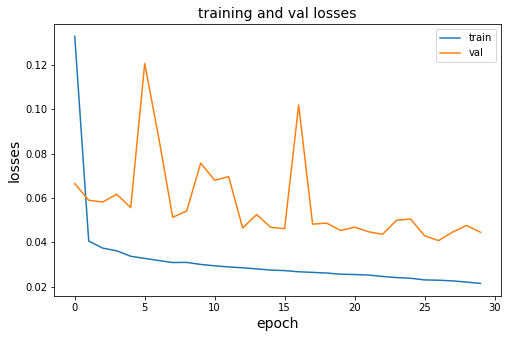

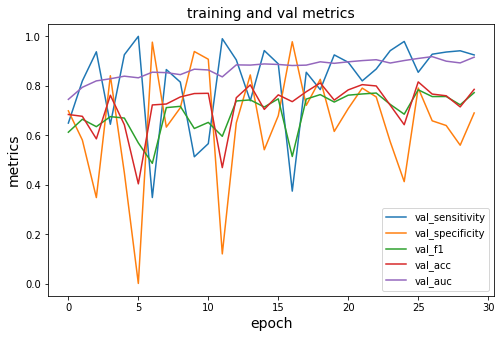

Epoch [30] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [30][0/804]	Time 0.999 (0.999)	Loss 0.0109 (0.0109)	Sensitivity 1.000 (1.000)	Specificity 1.000 (1.000)	F1 1.000 (1.000)	Accuracy 1.000 (1.000)	
Epoch: [30][10/804]	Time 0.778 (0.797)	Loss 0.0261 (0.0169)	Sensitivity 0.920 (0.976)	Specificity 0.857 (0.853)	F1 0.939 (0.946)	Accuracy 0.906 (0.929)	
Epoch: [30][20/804]	Time 0.780 (0.790)	Loss 0.0176 (0.0175)	Sensitivity 1.000 (0.983)	Specificity 0.714 (0.800)	F1 0.900 (0.933)	Accuracy 0.875 (0.911)	
Epoch: [30][30/804]	Time 0.788 (0.788)	Loss 0.0258 (0.0183)	Sensitivity 0.917 (0.986)	Specificity 0.875 (0.805)	F1 0.936 (0.934)	Accuracy 0.906 (0.913)	
Epoch: [30][40/804]	Time 0.782 (0.787)	Loss 0.0145 (0.0184)	Sensitivity 1.000 (0.984)	Specificity 0.857 (0.807)	F1 0.947 (0.935)	Accuracy 0.938 (0.915)	
Epoch: [30][50/804]	Time 0.779 (0.786)	Loss 0.0077 (0.0181)	Sensitivity 1.000 (0.986)	Specificity 1.000 (0.803)	F1 1.000 (0.936)	Accuracy 1.000 (0.915)	
Epoch: [30][60/804]	Time 0.787 (0.786)	Loss 0.0135 (0.0191)	Sensitivity 1.000 (0.98

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.792 (0.792)	Loss 0.0297 (0.0297)	Sensitivity 0.923 (0.923)	Specificity 0.895 (0.895)	F1 0.889 (0.889)	Accuracy 0.906 (0.906)	
Test: [10/60]	Time 0.239 (0.290)	Loss 0.0824 (0.0401)	Sensitivity 0.812 (0.920)	Specificity 0.625 (0.771)	F1 0.743 (0.814)	Accuracy 0.719 (0.832)	
Test: [20/60]	Time 0.241 (0.264)	Loss 0.0271 (0.0361)	Sensitivity 1.000 (0.926)	Specificity 0.750 (0.775)	F1 0.727 (0.821)	Accuracy 0.812 (0.839)	
Test: [30/60]	Time 0.237 (0.255)	Loss 0.0263 (0.0366)	Sensitivity 0.937 (0.928)	Specificity 0.812 (0.778)	F1 0.882 (0.823)	Accuracy 0.875 (0.842)	
Test: [40/60]	Time 0.236 (0.251)	Loss 0.0466 (0.0361)	Sensitivity 0.833 (0.918)	Specificity 0.650 (0.779)	F1 0.690 (0.813)	Accuracy 0.719 (0.836)	
Test: [50/60]	Time 0.235 (0.248)	Loss 0.0423 (0.0363)	Sensitivity 0.875 (0.914)	Specificity 0.750 (0.774)	F1 0.824 (0.808)	Accuracy 0.812 (0.832)	
 * Sensitivity 0.910 Specificity 0.776 F1 0.806 Acc 0.832 ROC AUC 0.932
Epoch [31] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [31][0/804]	Time 0.903 (0.903)	Loss 0.0138 (0.0138)	Sensitivity 1.000 (1.000)	Specificity 0.875 (0.875)	F1 0.980 (0.980)	Accuracy 0.969 (0.969)	
Epoch: [31][10/804]	Time 0.783 (0.792)	Loss 0.0108 (0.0139)	Sensitivity 1.000 (0.992)	Specificity 0.929 (0.887)	F1 0.973 (0.965)	Accuracy 0.969 (0.955)	
Epoch: [31][20/804]	Time 0.782 (0.787)	Loss 0.0085 (0.0149)	Sensitivity 1.000 (0.987)	Specificity 0.900 (0.867)	F1 0.978 (0.955)	Accuracy 0.969 (0.942)	
Epoch: [31][30/804]	Time 0.787 (0.786)	Loss 0.0139 (0.0150)	Sensitivity 1.000 (0.984)	Specificity 0.667 (0.849)	F1 0.909 (0.952)	Accuracy 0.875 (0.935)	
Epoch: [31][40/804]	Time 0.780 (0.785)	Loss 0.0324 (0.0160)	Sensitivity 0.952 (0.979)	Specificity 0.909 (0.852)	F1 0.952 (0.951)	Accuracy 0.938 (0.934)	
Epoch: [31][50/804]	Time 0.791 (0.785)	Loss 0.0211 (0.0161)	Sensitivity 0.920 (0.977)	Specificity 0.857 (0.853)	F1 0.939 (0.951)	Accuracy 0.906 (0.934)	
Epoch: [31][60/804]	Time 0.783 (0.785)	Loss 0.0108 (0.0164)	Sensitivity 1.000 (0.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.734 (0.734)	Loss 0.0510 (0.0510)	Sensitivity 0.727 (0.727)	Specificity 0.762 (0.762)	F1 0.667 (0.667)	Accuracy 0.750 (0.750)	
Test: [10/60]	Time 0.236 (0.283)	Loss 0.0439 (0.0445)	Sensitivity 0.937 (0.866)	Specificity 0.687 (0.782)	F1 0.833 (0.778)	Accuracy 0.812 (0.818)	
Test: [20/60]	Time 0.234 (0.261)	Loss 0.0341 (0.0380)	Sensitivity 0.929 (0.888)	Specificity 0.833 (0.790)	F1 0.867 (0.788)	Accuracy 0.875 (0.832)	
Test: [30/60]	Time 0.235 (0.253)	Loss 0.0288 (0.0396)	Sensitivity 0.929 (0.890)	Specificity 0.833 (0.777)	F1 0.867 (0.788)	Accuracy 0.875 (0.824)	
Test: [40/60]	Time 0.236 (0.249)	Loss 0.0401 (0.0375)	Sensitivity 0.882 (0.894)	Specificity 0.733 (0.784)	F1 0.833 (0.792)	Accuracy 0.812 (0.829)	
Test: [50/60]	Time 0.236 (0.246)	Loss 0.0317 (0.0387)	Sensitivity 0.909 (0.895)	Specificity 0.857 (0.783)	F1 0.833 (0.798)	Accuracy 0.875 (0.830)	
 * Sensitivity 0.900 Specificity 0.790 F1 0.806 Acc 0.835 ROC AUC 0.931
Epoch [32] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [32][0/804]	Time 0.967 (0.967)	Loss 0.0197 (0.0197)	Sensitivity 0.950 (0.950)	Specificity 0.750 (0.750)	F1 0.905 (0.905)	Accuracy 0.875 (0.875)	
Epoch: [32][10/804]	Time 0.782 (0.795)	Loss 0.0186 (0.0139)	Sensitivity 0.955 (0.987)	Specificity 0.900 (0.846)	F1 0.955 (0.957)	Accuracy 0.938 (0.940)	
Epoch: [32][20/804]	Time 0.779 (0.788)	Loss 0.0119 (0.0146)	Sensitivity 1.000 (0.987)	Specificity 0.750 (0.833)	F1 0.930 (0.945)	Accuracy 0.906 (0.929)	
Epoch: [32][30/804]	Time 0.782 (0.786)	Loss 0.0221 (0.0158)	Sensitivity 0.950 (0.983)	Specificity 0.917 (0.830)	F1 0.950 (0.944)	Accuracy 0.938 (0.926)	
Epoch: [32][40/804]	Time 0.779 (0.785)	Loss 0.0101 (0.0157)	Sensitivity 1.000 (0.981)	Specificity 0.909 (0.842)	F1 0.977 (0.947)	Accuracy 0.969 (0.930)	
Epoch: [32][50/804]	Time 0.784 (0.785)	Loss 0.0050 (0.0154)	Sensitivity 1.000 (0.982)	Specificity 1.000 (0.855)	F1 1.000 (0.949)	Accuracy 1.000 (0.934)	
Epoch: [32][60/804]	Time 0.779 (0.784)	Loss 0.0258 (0.0160)	Sensitivity 0.905 (0.98

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.739 (0.739)	Loss 0.0134 (0.0134)	Sensitivity 1.000 (1.000)	Specificity 0.867 (0.867)	F1 0.944 (0.944)	Accuracy 0.938 (0.938)	
Test: [10/60]	Time 0.237 (0.290)	Loss 0.0422 (0.0322)	Sensitivity 0.923 (0.956)	Specificity 0.632 (0.759)	F1 0.750 (0.819)	Accuracy 0.750 (0.835)	
Test: [20/60]	Time 0.236 (0.265)	Loss 0.0558 (0.0348)	Sensitivity 0.857 (0.927)	Specificity 0.722 (0.772)	F1 0.774 (0.816)	Accuracy 0.781 (0.835)	
Test: [30/60]	Time 0.238 (0.256)	Loss 0.0399 (0.0369)	Sensitivity 0.692 (0.905)	Specificity 0.842 (0.775)	F1 0.720 (0.810)	Accuracy 0.781 (0.828)	
Test: [40/60]	Time 0.240 (0.251)	Loss 0.0256 (0.0361)	Sensitivity 0.909 (0.912)	Specificity 0.857 (0.776)	F1 0.833 (0.806)	Accuracy 0.875 (0.828)	
Test: [50/60]	Time 0.234 (0.248)	Loss 0.0474 (0.0367)	Sensitivity 0.733 (0.911)	Specificity 1.000 (0.776)	F1 0.846 (0.805)	Accuracy 0.875 (0.828)	
 * Sensitivity 0.902 Specificity 0.780 F1 0.803 Acc 0.828 ROC AUC 0.929
Epoch [33] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [33][0/804]	Time 1.010 (1.010)	Loss 0.0132 (0.0132)	Sensitivity 1.000 (1.000)	Specificity 0.750 (0.750)	F1 0.930 (0.930)	Accuracy 0.906 (0.906)	
Epoch: [33][10/804]	Time 0.782 (0.800)	Loss 0.0144 (0.0162)	Sensitivity 1.000 (0.984)	Specificity 0.833 (0.808)	F1 0.952 (0.946)	Accuracy 0.938 (0.926)	
Epoch: [33][20/804]	Time 0.778 (0.791)	Loss 0.0087 (0.0159)	Sensitivity 1.000 (0.982)	Specificity 0.923 (0.833)	F1 0.974 (0.948)	Accuracy 0.969 (0.930)	
Epoch: [33][30/804]	Time 0.783 (0.788)	Loss 0.0064 (0.0153)	Sensitivity 1.000 (0.985)	Specificity 0.875 (0.818)	F1 0.980 (0.945)	Accuracy 0.969 (0.925)	
Epoch: [33][40/804]	Time 0.788 (0.787)	Loss 0.0159 (0.0155)	Sensitivity 0.955 (0.981)	Specificity 0.800 (0.818)	F1 0.933 (0.945)	Accuracy 0.906 (0.925)	
Epoch: [33][50/804]	Time 0.781 (0.786)	Loss 0.0349 (0.0159)	Sensitivity 0.900 (0.982)	Specificity 0.583 (0.813)	F1 0.837 (0.943)	Accuracy 0.781 (0.922)	
Epoch: [33][60/804]	Time 0.780 (0.786)	Loss 0.0161 (0.0153)	Sensitivity 1.000 (0.98

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.815 (0.815)	Loss 0.0303 (0.0303)	Sensitivity 0.944 (0.944)	Specificity 0.786 (0.786)	F1 0.895 (0.895)	Accuracy 0.875 (0.875)	
Test: [10/60]	Time 0.237 (0.293)	Loss 0.0438 (0.0379)	Sensitivity 0.889 (0.889)	Specificity 0.652 (0.786)	F1 0.640 (0.813)	Accuracy 0.719 (0.830)	
Test: [20/60]	Time 0.238 (0.266)	Loss 0.0420 (0.0372)	Sensitivity 0.875 (0.898)	Specificity 0.875 (0.806)	F1 0.875 (0.822)	Accuracy 0.875 (0.845)	
Test: [30/60]	Time 0.237 (0.257)	Loss 0.0219 (0.0368)	Sensitivity 1.000 (0.911)	Specificity 0.737 (0.801)	F1 0.839 (0.829)	Accuracy 0.844 (0.848)	
Test: [40/60]	Time 0.236 (0.252)	Loss 0.0532 (0.0378)	Sensitivity 1.000 (0.894)	Specificity 0.500 (0.800)	F1 0.645 (0.812)	Accuracy 0.656 (0.840)	
Test: [50/60]	Time 0.237 (0.249)	Loss 0.0399 (0.0379)	Sensitivity 0.833 (0.888)	Specificity 0.808 (0.799)	F1 0.625 (0.807)	Accuracy 0.812 (0.837)	
 * Sensitivity 0.886 Specificity 0.800 F1 0.807 Acc 0.837 ROC AUC 0.930
Epoch [34] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [34][0/804]	Time 1.014 (1.014)	Loss 0.0202 (0.0202)	Sensitivity 0.957 (0.957)	Specificity 0.778 (0.778)	F1 0.936 (0.936)	Accuracy 0.906 (0.906)	
Epoch: [34][10/804]	Time 0.780 (0.801)	Loss 0.0152 (0.0153)	Sensitivity 1.000 (0.989)	Specificity 0.833 (0.844)	F1 0.952 (0.940)	Accuracy 0.938 (0.926)	
Epoch: [34][20/804]	Time 0.782 (0.791)	Loss 0.0120 (0.0139)	Sensitivity 1.000 (0.992)	Specificity 0.786 (0.842)	F1 0.923 (0.944)	Accuracy 0.906 (0.930)	
Epoch: [34][30/804]	Time 0.786 (0.788)	Loss 0.0064 (0.0131)	Sensitivity 1.000 (0.986)	Specificity 0.875 (0.856)	F1 0.980 (0.949)	Accuracy 0.969 (0.934)	
Epoch: [34][40/804]	Time 0.777 (0.786)	Loss 0.0152 (0.0140)	Sensitivity 1.000 (0.984)	Specificity 0.714 (0.850)	F1 0.900 (0.947)	Accuracy 0.875 (0.931)	
Epoch: [34][50/804]	Time 0.782 (0.785)	Loss 0.0164 (0.0145)	Sensitivity 0.947 (0.984)	Specificity 0.846 (0.837)	F1 0.923 (0.943)	Accuracy 0.906 (0.927)	
Epoch: [34][60/804]	Time 0.782 (0.784)	Loss 0.0105 (0.0143)	Sensitivity 1.000 (0.98

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.896 (0.896)	Loss 0.0640 (0.0640)	Sensitivity 0.818 (0.818)	Specificity 0.762 (0.762)	F1 0.720 (0.720)	Accuracy 0.781 (0.781)	
Test: [10/60]	Time 0.234 (0.299)	Loss 0.0309 (0.0375)	Sensitivity 1.000 (0.928)	Specificity 0.789 (0.759)	F1 0.867 (0.816)	Accuracy 0.875 (0.830)	
Test: [20/60]	Time 0.236 (0.269)	Loss 0.0332 (0.0410)	Sensitivity 0.929 (0.896)	Specificity 0.778 (0.752)	F1 0.839 (0.803)	Accuracy 0.844 (0.817)	
Test: [30/60]	Time 0.235 (0.259)	Loss 0.0248 (0.0392)	Sensitivity 0.909 (0.900)	Specificity 0.810 (0.758)	F1 0.800 (0.802)	Accuracy 0.844 (0.820)	
Test: [40/60]	Time 0.236 (0.253)	Loss 0.0185 (0.0396)	Sensitivity 1.000 (0.908)	Specificity 0.783 (0.753)	F1 0.783 (0.794)	Accuracy 0.844 (0.816)	
Test: [50/60]	Time 0.237 (0.250)	Loss 0.0733 (0.0404)	Sensitivity 0.900 (0.909)	Specificity 0.636 (0.754)	F1 0.667 (0.793)	Accuracy 0.719 (0.815)	
 * Sensitivity 0.910 Specificity 0.756 F1 0.796 Acc 0.818 ROC AUC 0.927
Epoch [35] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [35][0/804]	Time 0.972 (0.972)	Loss 0.0066 (0.0066)	Sensitivity 1.000 (1.000)	Specificity 0.909 (0.909)	F1 0.977 (0.977)	Accuracy 0.969 (0.969)	
Epoch: [35][10/804]	Time 0.781 (0.797)	Loss 0.0111 (0.0115)	Sensitivity 1.000 (0.992)	Specificity 0.800 (0.830)	F1 0.957 (0.958)	Accuracy 0.938 (0.940)	
Epoch: [35][20/804]	Time 0.781 (0.789)	Loss 0.0039 (0.0118)	Sensitivity 1.000 (0.989)	Specificity 0.900 (0.857)	F1 0.978 (0.957)	Accuracy 0.969 (0.942)	
Epoch: [35][30/804]	Time 0.784 (0.787)	Loss 0.0131 (0.0117)	Sensitivity 0.957 (0.989)	Specificity 1.000 (0.876)	F1 0.978 (0.961)	Accuracy 0.969 (0.948)	
Epoch: [35][40/804]	Time 0.784 (0.786)	Loss 0.0195 (0.0125)	Sensitivity 1.000 (0.988)	Specificity 0.727 (0.867)	F1 0.933 (0.956)	Accuracy 0.906 (0.943)	
Epoch: [35][50/804]	Time 0.787 (0.785)	Loss 0.0128 (0.0120)	Sensitivity 0.933 (0.988)	Specificity 0.882 (0.870)	F1 0.903 (0.957)	Accuracy 0.906 (0.945)	
Epoch: [35][60/804]	Time 0.789 (0.785)	Loss 0.0149 (0.0126)	Sensitivity 1.000 (0.98

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.791 (0.791)	Loss 0.0628 (0.0628)	Sensitivity 0.786 (0.786)	Specificity 0.944 (0.944)	F1 0.846 (0.846)	Accuracy 0.875 (0.875)	
Test: [10/60]	Time 0.239 (0.290)	Loss 0.0494 (0.0467)	Sensitivity 0.857 (0.852)	Specificity 0.840 (0.838)	F1 0.706 (0.811)	Accuracy 0.844 (0.849)	
Test: [20/60]	Time 0.236 (0.264)	Loss 0.0352 (0.0443)	Sensitivity 0.857 (0.859)	Specificity 0.889 (0.844)	F1 0.857 (0.820)	Accuracy 0.875 (0.851)	
Test: [30/60]	Time 0.235 (0.255)	Loss 0.0257 (0.0423)	Sensitivity 0.917 (0.865)	Specificity 0.850 (0.844)	F1 0.846 (0.822)	Accuracy 0.875 (0.852)	
Test: [40/60]	Time 0.235 (0.251)	Loss 0.0566 (0.0419)	Sensitivity 0.625 (0.857)	Specificity 0.792 (0.837)	F1 0.556 (0.810)	Accuracy 0.750 (0.845)	
Test: [50/60]	Time 0.236 (0.248)	Loss 0.0792 (0.0441)	Sensitivity 0.727 (0.849)	Specificity 0.762 (0.832)	F1 0.667 (0.799)	Accuracy 0.750 (0.838)	
 * Sensitivity 0.854 Specificity 0.831 F1 0.802 Acc 0.840 ROC AUC 0.922
Epoch [36] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [36][0/804]	Time 0.994 (0.994)	Loss 0.0200 (0.0200)	Sensitivity 0.952 (0.952)	Specificity 0.909 (0.909)	F1 0.952 (0.952)	Accuracy 0.938 (0.938)	
Epoch: [36][10/804]	Time 0.780 (0.800)	Loss 0.0129 (0.0136)	Sensitivity 1.000 (0.987)	Specificity 0.769 (0.857)	F1 0.927 (0.951)	Accuracy 0.906 (0.938)	
Epoch: [36][20/804]	Time 0.778 (0.790)	Loss 0.0102 (0.0131)	Sensitivity 1.000 (0.993)	Specificity 0.933 (0.846)	F1 0.971 (0.951)	Accuracy 0.969 (0.938)	
Epoch: [36][30/804]	Time 0.779 (0.788)	Loss 0.0064 (0.0122)	Sensitivity 1.000 (0.994)	Specificity 1.000 (0.872)	F1 1.000 (0.959)	Accuracy 1.000 (0.948)	
Epoch: [36][40/804]	Time 0.778 (0.786)	Loss 0.0113 (0.0116)	Sensitivity 1.000 (0.994)	Specificity 1.000 (0.884)	F1 1.000 (0.962)	Accuracy 1.000 (0.952)	
Epoch: [36][50/804]	Time 0.775 (0.785)	Loss 0.0098 (0.0119)	Sensitivity 1.000 (0.992)	Specificity 0.846 (0.880)	F1 0.950 (0.960)	Accuracy 0.938 (0.949)	
Epoch: [36][60/804]	Time 0.786 (0.785)	Loss 0.0117 (0.0117)	Sensitivity 0.958 (0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.771 (0.771)	Loss 0.0556 (0.0556)	Sensitivity 0.700 (0.700)	Specificity 0.955 (0.955)	F1 0.778 (0.778)	Accuracy 0.875 (0.875)	
Test: [10/60]	Time 0.235 (0.290)	Loss 0.0599 (0.0505)	Sensitivity 0.750 (0.817)	Specificity 0.800 (0.783)	F1 0.720 (0.746)	Accuracy 0.781 (0.807)	
Test: [20/60]	Time 0.238 (0.265)	Loss 0.0184 (0.0427)	Sensitivity 1.000 (0.873)	Specificity 0.909 (0.807)	F1 0.909 (0.797)	Accuracy 0.938 (0.839)	
Test: [30/60]	Time 0.237 (0.256)	Loss 0.1027 (0.0448)	Sensitivity 0.765 (0.872)	Specificity 0.733 (0.823)	F1 0.765 (0.809)	Accuracy 0.750 (0.846)	
Test: [40/60]	Time 0.240 (0.252)	Loss 0.0240 (0.0462)	Sensitivity 1.000 (0.871)	Specificity 0.909 (0.813)	F1 0.909 (0.807)	Accuracy 0.938 (0.839)	
Test: [50/60]	Time 0.238 (0.249)	Loss 0.0620 (0.0461)	Sensitivity 0.800 (0.863)	Specificity 0.833 (0.818)	F1 0.842 (0.804)	Accuracy 0.812 (0.838)	
 * Sensitivity 0.868 Specificity 0.824 F1 0.811 Acc 0.845 ROC AUC 0.924
Epoch [37] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [37][0/804]	Time 0.948 (0.948)	Loss 0.0075 (0.0075)	Sensitivity 1.000 (1.000)	Specificity 1.000 (1.000)	F1 1.000 (1.000)	Accuracy 1.000 (1.000)	
Epoch: [37][10/804]	Time 0.779 (0.796)	Loss 0.0046 (0.0097)	Sensitivity 1.000 (0.993)	Specificity 1.000 (0.906)	F1 1.000 (0.970)	Accuracy 1.000 (0.960)	
Epoch: [37][20/804]	Time 0.786 (0.789)	Loss 0.0039 (0.0096)	Sensitivity 1.000 (0.996)	Specificity 1.000 (0.878)	F1 1.000 (0.966)	Accuracy 1.000 (0.954)	
Epoch: [37][30/804]	Time 0.783 (0.786)	Loss 0.0101 (0.0087)	Sensitivity 1.000 (0.996)	Specificity 0.875 (0.898)	F1 0.980 (0.971)	Accuracy 0.969 (0.961)	
Epoch: [37][40/804]	Time 0.782 (0.785)	Loss 0.0109 (0.0089)	Sensitivity 1.000 (0.994)	Specificity 0.917 (0.909)	F1 0.976 (0.972)	Accuracy 0.969 (0.963)	
Epoch: [37][50/804]	Time 0.784 (0.785)	Loss 0.0019 (0.0100)	Sensitivity 1.000 (0.991)	Specificity 1.000 (0.902)	F1 1.000 (0.967)	Accuracy 1.000 (0.958)	
Epoch: [37][60/804]	Time 0.784 (0.784)	Loss 0.0150 (0.0104)	Sensitivity 0.957 (0.98

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.810 (0.810)	Loss 0.0466 (0.0466)	Sensitivity 0.769 (0.769)	Specificity 0.842 (0.842)	F1 0.769 (0.769)	Accuracy 0.812 (0.812)	
Test: [10/60]	Time 0.238 (0.291)	Loss 0.0767 (0.0507)	Sensitivity 0.818 (0.884)	Specificity 0.952 (0.831)	F1 0.857 (0.825)	Accuracy 0.906 (0.852)	
Test: [20/60]	Time 0.238 (0.265)	Loss 0.0207 (0.0515)	Sensitivity 1.000 (0.872)	Specificity 0.812 (0.826)	F1 0.914 (0.818)	Accuracy 0.906 (0.847)	
Test: [30/60]	Time 0.238 (0.256)	Loss 0.0531 (0.0515)	Sensitivity 0.941 (0.866)	Specificity 0.600 (0.808)	F1 0.821 (0.804)	Accuracy 0.781 (0.835)	
Test: [40/60]	Time 0.237 (0.251)	Loss 0.0665 (0.0494)	Sensitivity 0.700 (0.869)	Specificity 0.727 (0.804)	F1 0.609 (0.803)	Accuracy 0.719 (0.832)	
Test: [50/60]	Time 0.236 (0.248)	Loss 0.0390 (0.0471)	Sensitivity 0.778 (0.870)	Specificity 0.783 (0.815)	F1 0.667 (0.803)	Accuracy 0.781 (0.838)	
 * Sensitivity 0.876 Specificity 0.809 F1 0.805 Acc 0.837 ROC AUC 0.922
Epoch [38] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [38][0/804]	Time 0.987 (0.987)	Loss 0.0127 (0.0127)	Sensitivity 1.000 (1.000)	Specificity 0.769 (0.769)	F1 0.927 (0.927)	Accuracy 0.906 (0.906)	
Epoch: [38][10/804]	Time 0.777 (0.797)	Loss 0.0126 (0.0104)	Sensitivity 1.000 (0.990)	Specificity 0.714 (0.854)	F1 0.962 (0.957)	Accuracy 0.938 (0.943)	
Epoch: [38][20/804]	Time 0.786 (0.789)	Loss 0.0062 (0.0091)	Sensitivity 1.000 (0.992)	Specificity 1.000 (0.884)	F1 1.000 (0.965)	Accuracy 1.000 (0.954)	
Epoch: [38][30/804]	Time 0.778 (0.787)	Loss 0.0031 (0.0089)	Sensitivity 1.000 (0.992)	Specificity 1.000 (0.902)	F1 1.000 (0.969)	Accuracy 1.000 (0.960)	
Epoch: [38][40/804]	Time 0.782 (0.786)	Loss 0.0078 (0.0093)	Sensitivity 1.000 (0.992)	Specificity 0.889 (0.894)	F1 0.979 (0.968)	Accuracy 0.969 (0.957)	
Epoch: [38][50/804]	Time 0.783 (0.786)	Loss 0.0101 (0.0094)	Sensitivity 1.000 (0.992)	Specificity 0.778 (0.896)	F1 0.958 (0.969)	Accuracy 0.938 (0.958)	
Epoch: [38][60/804]	Time 0.786 (0.786)	Loss 0.0058 (0.0094)	Sensitivity 1.000 (0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.872 (0.872)	Loss 0.0454 (0.0454)	Sensitivity 0.917 (0.917)	Specificity 0.750 (0.750)	F1 0.786 (0.786)	Accuracy 0.812 (0.812)	
Test: [10/60]	Time 0.234 (0.296)	Loss 0.0210 (0.0381)	Sensitivity 0.947 (0.901)	Specificity 0.846 (0.820)	F1 0.923 (0.832)	Accuracy 0.906 (0.858)	
Test: [20/60]	Time 0.235 (0.268)	Loss 0.1219 (0.0512)	Sensitivity 0.917 (0.898)	Specificity 0.700 (0.801)	F1 0.759 (0.822)	Accuracy 0.781 (0.844)	
Test: [30/60]	Time 0.239 (0.258)	Loss 0.0674 (0.0521)	Sensitivity 0.833 (0.880)	Specificity 0.650 (0.798)	F1 0.690 (0.803)	Accuracy 0.719 (0.832)	
Test: [40/60]	Time 0.231 (0.253)	Loss 0.0375 (0.0525)	Sensitivity 1.000 (0.884)	Specificity 0.700 (0.788)	F1 0.800 (0.800)	Accuracy 0.812 (0.828)	
Test: [50/60]	Time 0.237 (0.250)	Loss 0.0465 (0.0527)	Sensitivity 0.833 (0.875)	Specificity 0.750 (0.789)	F1 0.741 (0.796)	Accuracy 0.781 (0.826)	
 * Sensitivity 0.874 Specificity 0.790 F1 0.794 Acc 0.825 ROC AUC 0.919
Epoch [39] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [39][0/804]	Time 0.894 (0.894)	Loss 0.0177 (0.0177)	Sensitivity 0.950 (0.950)	Specificity 0.917 (0.917)	F1 0.950 (0.950)	Accuracy 0.938 (0.938)	
Epoch: [39][10/804]	Time 0.778 (0.791)	Loss 0.0139 (0.0098)	Sensitivity 1.000 (0.982)	Specificity 0.923 (0.942)	F1 0.974 (0.976)	Accuracy 0.969 (0.969)	
Epoch: [39][20/804]	Time 0.784 (0.786)	Loss 0.0161 (0.0104)	Sensitivity 1.000 (0.985)	Specificity 0.867 (0.920)	F1 0.944 (0.970)	Accuracy 0.938 (0.961)	
Epoch: [39][30/804]	Time 0.776 (0.784)	Loss 0.0046 (0.0092)	Sensitivity 1.000 (0.990)	Specificity 1.000 (0.930)	F1 1.000 (0.975)	Accuracy 1.000 (0.968)	
Epoch: [39][40/804]	Time 0.779 (0.783)	Loss 0.0070 (0.0086)	Sensitivity 1.000 (0.992)	Specificity 0.889 (0.928)	F1 0.979 (0.977)	Accuracy 0.969 (0.970)	
Epoch: [39][50/804]	Time 0.779 (0.783)	Loss 0.0050 (0.0080)	Sensitivity 1.000 (0.994)	Specificity 1.000 (0.931)	F1 1.000 (0.978)	Accuracy 1.000 (0.971)	
Epoch: [39][60/804]	Time 0.778 (0.782)	Loss 0.0069 (0.0079)	Sensitivity 1.000 (0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.707 (0.707)	Loss 0.0487 (0.0487)	Sensitivity 0.857 (0.857)	Specificity 0.889 (0.889)	F1 0.857 (0.857)	Accuracy 0.875 (0.875)	
Test: [10/60]	Time 0.237 (0.282)	Loss 0.0515 (0.0576)	Sensitivity 0.692 (0.828)	Specificity 0.842 (0.826)	F1 0.720 (0.790)	Accuracy 0.781 (0.824)	
Test: [20/60]	Time 0.237 (0.260)	Loss 0.0991 (0.0559)	Sensitivity 0.737 (0.860)	Specificity 0.769 (0.821)	F1 0.778 (0.805)	Accuracy 0.750 (0.833)	
Test: [30/60]	Time 0.237 (0.253)	Loss 0.0293 (0.0541)	Sensitivity 0.923 (0.849)	Specificity 0.842 (0.824)	F1 0.857 (0.798)	Accuracy 0.875 (0.833)	
Test: [40/60]	Time 0.238 (0.249)	Loss 0.0371 (0.0540)	Sensitivity 1.000 (0.856)	Specificity 0.875 (0.823)	F1 0.842 (0.800)	Accuracy 0.906 (0.835)	
Test: [50/60]	Time 0.237 (0.246)	Loss 0.0121 (0.0528)	Sensitivity 1.000 (0.858)	Specificity 0.913 (0.825)	F1 0.900 (0.798)	Accuracy 0.938 (0.835)	
 * Sensitivity 0.861 Specificity 0.824 F1 0.802 Acc 0.838 ROC AUC 0.920
*******************PLOT HERE*******************

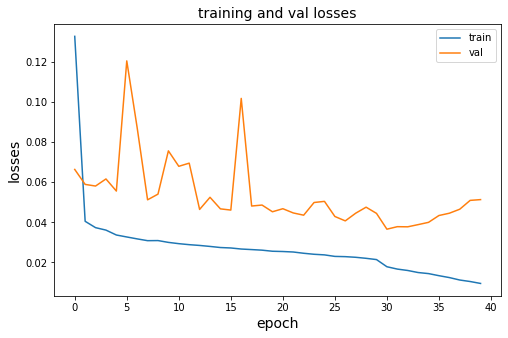

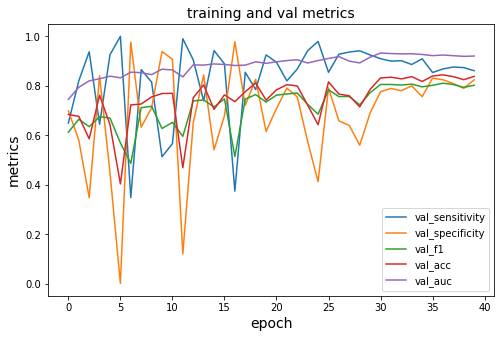

Epoch [40] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [40][0/804]	Time 1.063 (1.063)	Loss 0.0032 (0.0032)	Sensitivity 1.000 (1.000)	Specificity 1.000 (1.000)	F1 1.000 (1.000)	Accuracy 1.000 (1.000)	
Epoch: [40][10/804]	Time 0.784 (0.804)	Loss 0.0128 (0.0080)	Sensitivity 1.000 (0.990)	Specificity 0.818 (0.919)	F1 0.955 (0.976)	Accuracy 0.938 (0.966)	
Epoch: [40][20/804]	Time 0.784 (0.793)	Loss 0.0189 (0.0095)	Sensitivity 0.952 (0.992)	Specificity 0.909 (0.888)	F1 0.952 (0.965)	Accuracy 0.938 (0.954)	
Epoch: [40][30/804]	Time 0.780 (0.789)	Loss 0.0090 (0.0091)	Sensitivity 0.955 (0.992)	Specificity 1.000 (0.905)	F1 0.977 (0.970)	Accuracy 0.969 (0.961)	
Epoch: [40][40/804]	Time 0.787 (0.788)	Loss 0.0140 (0.0092)	Sensitivity 1.000 (0.991)	Specificity 0.800 (0.893)	F1 0.957 (0.968)	Accuracy 0.938 (0.957)	
Epoch: [40][50/804]	Time 0.785 (0.787)	Loss 0.0060 (0.0090)	Sensitivity 1.000 (0.993)	Specificity 1.000 (0.898)	F1 1.000 (0.970)	Accuracy 1.000 (0.960)	
Epoch: [40][60/804]	Time 0.783 (0.786)	Loss 0.0115 (0.0087)	Sensitivity 0.957 (0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test: [0/60]	Time 0.847 (0.847)	Loss 0.0232 (0.0232)	Sensitivity 0.895 (0.895)	Specificity 0.923 (0.923)	F1 0.919 (0.919)	Accuracy 0.906 (0.906)	
Test: [10/60]	Time 0.235 (0.297)	Loss 0.0505 (0.0549)	Sensitivity 0.875 (0.829)	Specificity 0.937 (0.873)	F1 0.903 (0.822)	Accuracy 0.906 (0.855)	
Test: [20/60]	Time 0.235 (0.268)	Loss 0.0910 (0.0565)	Sensitivity 0.750 (0.840)	Specificity 0.850 (0.865)	F1 0.750 (0.811)	Accuracy 0.812 (0.853)	
Test: [30/60]	Time 0.237 (0.259)	Loss 0.0859 (0.0590)	Sensitivity 0.692 (0.839)	Specificity 0.789 (0.854)	F1 0.692 (0.802)	Accuracy 0.750 (0.846)	
Test: [40/60]	Time 0.234 (0.253)	Loss 0.0441 (0.0571)	Sensitivity 0.846 (0.840)	Specificity 0.895 (0.854)	F1 0.846 (0.806)	Accuracy 0.875 (0.846)	
Test: [50/60]	Time 0.237 (0.250)	Loss 0.0542 (0.0571)	Sensitivity 0.727 (0.844)	Specificity 0.857 (0.858)	F1 0.727 (0.815)	Accuracy 0.812 (0.851)	
 * Sensitivity 0.851 Specificity 0.850 F1 0.811 Acc 0.848 ROC AUC 0.919
Epoch [41] Learning rate: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: [41][0/804]	Time 0.976 (0.976)	Loss 0.0029 (0.0029)	Sensitivity 1.000 (1.000)	Specificity 1.000 (1.000)	F1 1.000 (1.000)	Accuracy 1.000 (1.000)	
Epoch: [41][10/804]	Time 0.776 (0.797)	Loss 0.0025 (0.0059)	Sensitivity 1.000 (0.997)	Specificity 1.000 (0.971)	F1 1.000 (0.989)	Accuracy 1.000 (0.986)	
Epoch: [41][20/804]	Time 0.779 (0.789)	Loss 0.0042 (0.0057)	Sensitivity 1.000 (0.998)	Specificity 0.923 (0.952)	F1 0.974 (0.983)	Accuracy 0.969 (0.979)	
Epoch: [41][30/804]	Time 0.785 (0.787)	Loss 0.0036 (0.0061)	Sensitivity 1.000 (0.996)	Specificity 1.000 (0.953)	F1 1.000 (0.982)	Accuracy 1.000 (0.978)	
Epoch: [41][40/804]	Time 0.779 (0.786)	Loss 0.0036 (0.0068)	Sensitivity 1.000 (0.995)	Specificity 1.000 (0.942)	F1 1.000 (0.979)	Accuracy 1.000 (0.973)	
Epoch: [41][50/804]	Time 0.782 (0.785)	Loss 0.0055 (0.0068)	Sensitivity 1.000 (0.996)	Specificity 1.000 (0.940)	F1 1.000 (0.978)	Accuracy 1.000 (0.973)	
Epoch: [41][60/804]	Time 0.782 (0.785)	Loss 0.0046 (0.0070)	Sensitivity 1.000 (0.99

In [ ]:
# run main training
trainer.main_train(conf)